Nama: Mochammad Iqbal Latief <br>
Capstone 2 - Job Connector Data Science Online Learning Program

**Latar Belakang:**<br>
Dalam dataset rekaman perjalanan New York City Taxi and Limousine Commission, terdapat dua vendor utama yang menyediakan layanan pencatatan perjalanan, yaitu Creative Mobile Technologies, LLC. dan VeriFone Inc. Analisis awal menunjukkan adanya variasi dalam jumlah perjalanan, jarak perjalanan, dan pendapatan di seluruh zona kota.

<br>

**Masalah:**

**Kurangnya Pemahaman Tentang Preferensi Penumpang:**

- NYC TLC Telah menetapkan kendaraan yang akan di lacak menggunakan 2 vendor yang berbeda yaitu vendor 1 (Creative Mobile Technologies, LLC.) dan vendor 2 (VeriFone Inc.). Saat ini kita dapati bahwa dalam periode tercatat, jumlah trip lebih banyak terjadi untuk kendaraan yang dilacak dengan vendor 2 dari pada vendor 1 dengan perbedaan yang cukup signifikan sehingga ada potensi bahwa kendaraan yang dilacak menggunakan vendor 1 memiliki karakteristik yang berbeda dengan yang dilacak menggunakan vendor 2.
- Belum ada analisis mendalam mengenai preferensi penumpang berdasarkan zona, waktu, dan jenis perjalanan dan lain-lain sehingga kita belum bisa memaksimalkan trip yang terjadi pada tiap vendor.

<br>

**Tujuan:** <br>
Tim data analyst diminta untuk melakukan analisis mendalam untuk:

- Mengidentifikasi perbedaan karakteristik perjalanan yang terjadi antara kendaraan yang dilacak menggunakan vendor 1 dan juga vendor 2.
- Mengidentifikasi preferensi penumpang berdasarkan waktu (jam, hari dalam seminggu) dan jenis perjalanan (jarak pendek vs. jarak panjang).
- Memberikan rekomendasi strategi bisnis yang dapat meningkatkan jumlah perjalanan dan pendapatan berdasarkan temuan analisis.

**Gambaran Umum Dataset** <br>
Dataset ini mencakup variabel kunci berikut:

- VendorID: Pengidentifikasi untuk provider yang melakukan pencatatan untuk taksi
- lpep_pickup_datetime: Tanggal dan waktu ketika perjalanan dimulai.
- lpep_dropoff_datetime: Tanggal dan waktu ketika perjalanan berakhir.
- store_and_fwd_flag: Flag yang menunjukkan apakah data perjalanan disimpan - dalam kendaraan sebelum dikirim ke server (Y atau N).
- RatecodeID: Kode yang menunjukkan jenis tarif yang digunakan.
- PULocationID dan DOLocationID: Pengidentifikasi lokasi penjemputan dan pengantaran.
- passenger_count: Jumlah penumpang.
- trip_distance: Jarak perjalanan dalam mil.
- fare_amount: Tarif dasar perjalanan.
- extra: Biaya tambahan (surcharge).
- mta_tax: Pajak Metropolitan Transportation Authority.
- tip_amount: Tip yang diberikan kepada pengemudi.
- tolls_amount: Tol yang dibayar selama perjalanan.
- total_amount: Total biaya perjalanan.
- payment_type: Metode pembayaran (misalnya, kartu kredit, tunai).
- trip_type: Jenis perjalanan (misalnya, standar, perjalanan grup).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy as sc
from scipy.stats import shapiro, f_oneway,anderson
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, kruskal, chi2_contingency

# **DATA PREPARATION**

- Pertama-tama kita akan mengimport dataset yang akan digunakan untuk analisa. Saya akan menggunakan dua dataset yaitu ***NYC TLC Trip Record dan Taxi Zones***.
- ***NYC TLC Trip*** Record merupakan dataset yang merangkum customer journey penumpang taxi di US seperti titik penjemputan dan pemberhentian, detail pembayaran dan jumlah uang yang dibayar, dan lain-lain.
- ***Taxi Zones*** dataset adalah data yang digunakan sebagai rujukan untuk melihat lebih spesifik kota, daerah, dan wilayah dari mana penumpang berangkat dan berhenti.

In [ ]:
# Original Google Sheets URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1DpP_0QO70bo2HRNooxK-HvxI019N_KDyW1YTEEmYwQM/edit?usp=sharing'

# Correct URL format for CSV export
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Read the CSV data into a DataFrame
NYC_record = pd.read_csv(csv_url)
NYC_record.head()

<ipython-input-2-fd963dbd58f5>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  NYC_record = pd.read_csv(csv_url)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 0:26:10,2023-01-01 0:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 0:51:03,2023-01-01 0:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 0:35:12,2023-01-01 0:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 0:13:14,2023-01-01 0:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 0:33:04,2023-01-01 0:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [ ]:
NYC_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63885 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [ ]:
# Original Google Sheets URL
sheet_url_2 = 'https://docs.google.com/spreadsheets/d/1bxebmlBzQOmSBwnVyM_2jcDSr4qAbj83cTLvd70iO88/edit?usp=sharing'

# Correct URL format for CSV export
csv_url_2 = sheet_url_2.replace('/edit?usp=sharing', '/export?format=csv')

# Read the CSV data into a DataFrame
taxi_zones = pd.read_csv(csv_url_2)
taxi_zones.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,NaN,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


In [ ]:
taxi_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   the_geom    246 non-null    object 
 3   Shape_Area  263 non-null    float64
 4   zone        263 non-null    object 
 5   LocationID  263 non-null    int64  
 6   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.5+ KB


## Merging Datasets

- Kita akan menggabungkan dua dataset yaitu NYC TLC Trip Record dan Taxi Zones Dataset

In [ ]:
# Kita akan mengambil key value dari Taxi Zones dataset, yaitu LocationID', untuk digabungkan dengan key value pada NYC TLC Trip Record, yaitu PULocationID dan DULocationID
# Kemudian kita juga mengambil dua kolom penting dari Taxi Zones Dataset yaitu Zone dan Borough

taxi_zones_selected = taxi_zones[['LocationID', 'zone', 'borough']]
taxi_zones_selected.columns = ['LocationID', 'Zone', 'Borough']

In [ ]:
# Menggabungkan data untuk mendapatkan pickup zone dan borough
data = NYC_record.merge(taxi_zones_selected, how='left', left_on='PULocationID', right_on='LocationID')
data = data.rename(columns={'Zone': 'pickup_zone', 'Borough': 'pickup_borough'}).drop(columns='LocationID')

# Menggabungkan data untuk mendapatkan dropoff zone dan borough
data = data.merge(taxi_zones_selected, how='left', left_on='DOLocationID', right_on='LocationID')
data = data.rename(columns={'Zone': 'dropoff_zone', 'Borough': 'dropoff_borough'}).drop(columns='LocationID')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68658 entries, 0 to 68657
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68658 non-null  int64  
 1   lpep_pickup_datetime   68658 non-null  object 
 2   lpep_dropoff_datetime  68658 non-null  object 
 3   store_and_fwd_flag     64322 non-null  object 
 4   RatecodeID             64320 non-null  float64
 5   PULocationID           68658 non-null  int64  
 6   DOLocationID           68658 non-null  int64  
 7   passenger_count        64322 non-null  float64
 8   trip_distance          68658 non-null  float64
 9   fare_amount            68658 non-null  float64
 10  extra                  68658 non-null  float64
 11  mta_tax                68658 non-null  float64
 12  tip_amount             68658 non-null  float64
 13  tolls_amount           68658 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

**NOTES:**

- Pada tahap ini kita telah mengetahui zona/kota pickup maupun dropoff penumpang dengan menggabungkan dua dataset sebelumnya
- Kolom baru: ***pickup_zone, pickup_borough, dropoff_zone, dropoff_borough***

# **DATA CLEANING**

In [ ]:
# Membuat copy dari data asli

df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68658 entries, 0 to 68657
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68658 non-null  int64  
 1   lpep_pickup_datetime   68658 non-null  object 
 2   lpep_dropoff_datetime  68658 non-null  object 
 3   store_and_fwd_flag     64322 non-null  object 
 4   RatecodeID             64320 non-null  float64
 5   PULocationID           68658 non-null  int64  
 6   DOLocationID           68658 non-null  int64  
 7   passenger_count        64322 non-null  float64
 8   trip_distance          68658 non-null  float64
 9   fare_amount            68658 non-null  float64
 10  extra                  68658 non-null  float64
 11  mta_tax                68658 non-null  float64
 12  tip_amount             68658 non-null  float64
 13  tolls_amount           68658 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

## Datatype Formatting

- Pada tahap ini kita ingin mengubah tipe data sesuai dengan bentuk data yang seharusnya

In [ ]:
# Mengubah tipe data yang berkaitan dengan waktu menjadi datetime

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68658 entries, 0 to 68657
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68658 non-null  int64         
 1   lpep_pickup_datetime   68658 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68658 non-null  datetime64[ns]
 3   store_and_fwd_flag     64322 non-null  object        
 4   RatecodeID             64320 non-null  float64       
 5   PULocationID           68658 non-null  int64         
 6   DOLocationID           68658 non-null  int64         
 7   passenger_count        64322 non-null  float64       
 8   trip_distance          68658 non-null  float64       
 9   fare_amount            68658 non-null  float64       
 10  extra                  68658 non-null  float64       
 11  mta_tax                68658 non-null  float64       
 12  tip_amount             68658 non-null  float64       
 13  t

In [ ]:
# Mengubah tipe data kategorik menjadi string

df['VendorID'] = df['VendorID'].astype(str)
df['PULocationID'] = df['PULocationID'].astype(str)
df['DOLocationID'] = df['DOLocationID'].astype(str)
df['RatecodeID'] = df['RatecodeID'].astype(str)
df['payment_type'] = df['payment_type'].astype(str)
df['trip_type'] = df['trip_type'].astype(str)

**NOTES:**

- Kita sudah mengubah kolom yang berkaitan dengan waktu/tanggal menjadi datetime
- Kita mengubah kolom-kolom kategorikal yang masih dalam bentuk float menjadi string karena kita tidak bisa melakukan operasi matemtika pada kolom-kolom tersebut

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68658 entries, 0 to 68657
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68658 non-null  object        
 1   lpep_pickup_datetime   68658 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68658 non-null  datetime64[ns]
 3   store_and_fwd_flag     64322 non-null  object        
 4   RatecodeID             68658 non-null  object        
 5   PULocationID           68658 non-null  object        
 6   DOLocationID           68658 non-null  object        
 7   passenger_count        64322 non-null  float64       
 8   trip_distance          68658 non-null  float64       
 9   fare_amount            68658 non-null  float64       
 10  extra                  68658 non-null  float64       
 11  mta_tax                68658 non-null  float64       
 12  tip_amount             68658 non-null  float64       
 13  t

## Handling Missing Value

- Kita akan mengecek kolom yang memiliki null value dan mencari pattern nya



In [ ]:
df.shape

(68658, 24)

In [ ]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4336
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count           4336
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68658
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge      4336
pickup_zone                203
pickup_borough             203
dropoff_zone               684
dropoff_borough            684
dtype: int64

**NOTES:**

- Terdapat total 68658 rows data dengan 24 kolom.
- Beberapa kolom memiliki data yang kosong seperti pada ***store_and_fwd_flag, passenger_count, ehail_fee, congestion_surcharge, pickup_zone, pickup_borough, dropoff_zone, dan dropoff_borough.***
- Jangan lupa, kita juga punya data kosong pada kolom ***RatecodeID, payment_type, dan trip_type***. Kita tidak bisa melihatnya dengan menggunakan .isna().sum() karena tipe datanya sudah berubah menjadi string, dimana pada dataset ini data null ditandai dengan **'nan'**, oleh karena itu sistem menganggap bahwa **'nan'** merupakan value yang valid, padahal tidak. Kita akan mengubahnya nanti.

In [ ]:
# Cari baris di data df yang kolom passenger_count adalah null

df[df['store_and_fwd_flag'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough
64322,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,nan,7,17,NaN,9.33,36.03,...,NaN,1.0,44.44,nan,nan,NaN,Astoria,Queens,Bedford,Brooklyn
64323,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,nan,37,37,NaN,2.67,14.55,...,NaN,1.0,18.66,nan,nan,NaN,Bushwick South,Brooklyn,Bushwick South,Brooklyn
64324,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,nan,80,7,NaN,7.39,32.13,...,NaN,1.0,39.76,nan,nan,NaN,East Williamsburg,Brooklyn,Astoria,Queens
64325,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,nan,169,42,NaN,4.04,17.85,...,NaN,1.0,18.85,nan,nan,NaN,Mount Hope,Bronx,Central Harlem North,Manhattan
64326,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,nan,42,262,NaN,3.86,19.67,...,NaN,1.0,28.10,nan,nan,NaN,Central Harlem North,Manhattan,Yorkville East,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68653,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,nan,49,62,NaN,4070.82,15.70,...,NaN,1.0,16.70,nan,nan,NaN,Clinton Hill,Brooklyn,Crown Heights South,Brooklyn
68654,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,nan,10,205,NaN,2.14,4.41,...,NaN,1.0,5.41,nan,nan,NaN,Baisley Park,Queens,Saint Albans,Queens
68655,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,nan,66,37,NaN,3.44,16.53,...,NaN,1.0,21.04,nan,nan,NaN,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,Brooklyn
68656,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,nan,225,189,NaN,3.03,14.98,...,NaN,1.0,19.18,nan,nan,NaN,Stuyvesant Heights,Brooklyn,Prospect Heights,Brooklyn


In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.315360
RatecodeID                 0.000000
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.315360
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               0.000000
trip_type                  0.000000
congestion_surcharge       6.315360
pickup_zone                0.295668
pickup_borough             0.295668
dropoff_zone               0.996242
dropoff_borough            0.996242
dtype: float64

**NOTES:**

**1. Data Yang Bisa Diisi:**
  - Terdapat 4336 rows yang memiliki null value pada kolom ***store_and_fwd_flag dan passenger_count***. Kita bisa melihat juga null value tapi dalam bentuk NaN pada kolom ***RatecodeID, payment_type, dan trip_type*** yang tipe datanya adalah string
  - Akan tetapi, kita dapatkan bahwa kolom-kolom dengan null value tersebut masih memiliki variabel yang lengkap untuk kolom total_amount, sehingga jika kita drop akan mengihangkan sekitar **6.3%** data dari keseluruhan.
  - Oleh karena itu kita akan mengisi variabel yang kosong di dalam dataset dengan pendekatan business domain atau business understanding dan juga statistik.

**2. Data yang Bisa Dibuang:**
  - Selain itu kita juga mendapati adanya null value pada kolom ***pickup_zone, pickup_borough, dropoff_zone, dan dropoff_borough.***
  - Hal tersebut dikarenakan tidak adanya LocationID yang cocok dengan PULocationID dan DULocationID, sehingga beberapa data ada yang kosong.
  - Kita akan membuang data yang kosong tersebut karena memang tidak adanya referensi nama daerah atau wilayah untuk LocationID 263, 264, dan 265.


### Filling Missing Value

- Setelah dicek, ternyata baris yang memiliki null value di salah satu kolomnya akan mempunyai null value juga dikolom-kolom lainya, dan pattern ini terjadi disemua baris yang kosong (yang bisa diisi)
- jika kolom **store_and_fwd_flag kosong** maka **kolom passenger_count, RatecodeID, payment_type, dan trip_type juga akan kosong**
- Sehingga kita bisa mengisi data yang kosong dari pada harus membuangnya, sebab kolom yang kosong tidak dalam pattern yang acak/random. Kita bisa mengasumsikan ini sebagai error yang terjadi oleh driver ataupun device yang digunakan sehingga kolom yang berkaitan dengan customer dan rate/fee bisa kosong

filling passenger_count Column

In [ ]:
# Memfilter data untuk mencari jumlah passenger_count 1-9

filtered_data = df[df['passenger_count'].between(1, 9)]

# Menghitung jumlah trips per pickup zones dan passenger count
passenger_count_stats = filtered_data.groupby(['passenger_count', 'pickup_zone']).size().reset_index(name='total_trips')

# Mencari top 5 pikcup zone dengan total trips tertinggu untuk masing-masing passenger count
top_zones_by_passenger_count = passenger_count_stats.groupby('passenger_count').apply(lambda x: x.nlargest(5, 'total_trips')).reset_index(drop=True)
top_zones_by_passenger_count

,passenger_count,pickup_zone,total_trips
0,1.0,East Harlem North,11508
1,1.0,East Harlem South,7300
2,1.0,Forest Hills,3389
3,1.0,Central Harlem,3255
4,1.0,Morningside Heights,3016
5,2.0,East Harlem South,796
6,2.0,East Harlem North,574
7,2.0,Elmhurst,406
8,2.0,Fort Greene,270
9,2.0,Central Park,267


NOTE:

- Pada tahapan ini kita telah mendapatkan 5 total trip terbanyak berdasarkan unique passenger_count yang ada pada masing-masing zona penjemputan.
- data di atas dapat kita jadikan referensi untuk mengisi data kosong yang ada pada kolom passenger count.
- Kita akan melihat dari zona penjemputanya, apabila dari data yang kosong didapatkan bahwa zona penjemputanya sama dengan salah satu dari list zona diatas, maka kita akan mengisinya dengan referensi passenger_count yang ada

In [ ]:
# Membuat dictionary
zone_to_passenger_counts = top_zones_by_passenger_count.groupby('pickup_zone')['passenger_count'].apply(list).to_dict()

# Fungsi untuk mengisi passenger_count berdasarkan pickup zones dan passenger count
def fill_passenger_count(row):
    if pd.isna(row['passenger_count']):
        return zone_to_passenger_counts.get(row['pickup_zone'], [row['passenger_count']])[0]
    return row['passenger_count']

# Mengaplikasiakn fungsi
df['passenger_count'] = df.apply(fill_passenger_count, axis=1)

In [ ]:
df['passenger_count'].isna().sum()

2701

NOTE:

- Setelah diisi dengan referensi passenger_count yang kita buat sebelumnya, ternyata masih terdapat 2701 data yang kosong. Sehingga kita akan mengisi sisanya dengan median dari data tersebut karena datanya tidak berdistribusi normal
- Kita juga akan membulatkan median dari passenger_count, karena jumlah penumpang tidak mungkin bertipe float

In [ ]:
# Mencari modus dari passenger_count

df[['passenger_count']].median()

passenger_count    1.0
dtype: float64

In [ ]:
# Mengisi kolom numerikal yang memiliki null value

df['passenger_count'] = df['passenger_count'].fillna(1)

In [ ]:
df['passenger_count'].isna().sum()

0

NOTE:

- Kolom passenger_count sudah kita isi, sehingga tidak ada lagi value yang kosong pada kolom ini

filling congestion_surcharge

- Congestion Surchage adalah salah satu variabel yang akan dijumlahkan ketika mengkalkulasi total payment amount (***total_amount***) yang dibayar penumpang. Untuk menghitung ***total_amount***, rumusnya sebagai berikut
-  ***total_amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + imporvement surchage + congestion_surchage***
- Berarti jika kolom ***congestion_surchage*** ada yang kosong dan kita ingin mengisinya, kita harus memastikan bahwa nilai ***congestion_surchage*** yang tadinya null dan akan diisi, hasil pengisian datanya tidak akan mengubah hasil akhir/***total_amount*** yang dibayarkan pelanggan



In [ ]:
# Define a function to calculate the expected total amount and check against the actual total amount
def calculate_total_amount(row):
    return (
        row['fare_amount'] +
        row['extra'] +
        row['mta_tax'] +
        row['tip_amount'] +
        row['tolls_amount'] +
        row['improvement_surcharge'] +
        (row['congestion_surcharge'] if pd.notnull(row['congestion_surcharge']) else 0)
    )

In [ ]:
# Apply the function to each row and create a new column for the calculated total amount
df['calculated_total_amount'] = df.apply(calculate_total_amount, axis=1)

# Check where the calculated total amount matches the actual total amount
df['is_total_amount_correct'] = df['calculated_total_amount'] == df['total_amount']

In [ ]:
# Fill NaN values in congestion_surcharge with 0 where the total amount is correct
df.loc[
    (df['congestion_surcharge'].isna()) & (df['is_total_amount_correct']),
    'congestion_surcharge'
] = 0

In [ ]:
df.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag          4336
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                  68658
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
congestion_surcharge        1943
pickup_zone                  203
pickup_borough               203
dropoff_zone                 684
dropoff_borough              684
calculated_total_amount        0
is_total_amount_correct        0
dtype: int64

NOTE:

- Masih terdapat 1941 kolom yang kosong pada ***congestion_surchage***. Yang berarti jika kita mengisinya dengan nilai 0, maka nanti hasil ***total_amount*** akan salah.
- Oleh karena itu kita akan isi dengan hasil selisih angka yang seharusnya.

In [ ]:
# Recalculate total amount to see if there are still discrepancies
df['calculated_total_amount'] = df.apply(calculate_total_amount, axis=1)

# Fill NaN values in congestion_surcharge with calculated difference where the total amount is incorrect
df['congestion_surcharge'] = df.apply(
    lambda row: row['total_amount'] - (
        row['fare_amount'] +
        row['extra'] +
        row['mta_tax'] +
        row['tip_amount'] +
        row['tolls_amount'] +
        row['improvement_surcharge']
    ) if pd.isna(row['congestion_surcharge']) else row['congestion_surcharge'],
    axis=1
)

In [ ]:
df.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag          4336
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                  68658
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
congestion_surcharge           0
pickup_zone                  203
pickup_borough               203
dropoff_zone                 684
dropoff_borough              684
calculated_total_amount        0
is_total_amount_correct        0
dtype: int64

NOTE:

- Sekarang data kosong pada congestion_surchage sudah terisi semua

filling store_and_fwd_flag, RatecodeUD, payment_type, and trip_type

- Pertama kita akan mengecek unique value pada kolom RatecodeID, payment_type, dan trip_type
- Kemudian kita akan mengecek juga null value pada kolom store_and_fwd_flag.
- Terakhir kita akan mengisinya dengan modus/nilai yang sering muncul pada tiap-tiap kolomnya.

In [ ]:
df['RatecodeID'].unique()

array(['1.0', '5.0', '4.0', '3.0', '2.0', '99.0', 'nan'], dtype=object)

In [ ]:
df['payment_type'].unique()

array(['1.0', '2.0', '3.0', '4.0', '5.0', 'nan'], dtype=object)

In [ ]:
df['trip_type'].unique()

array(['1.0', '2.0', 'nan'], dtype=object)

In [ ]:
# Mengecek nilai yang paling sering muncul pada setiap kolom kategorikal yang memiliki null value

df[['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']].describe()

,store_and_fwd_flag,RatecodeID,payment_type,trip_type
count,64322,68658,68658,68658
unique,2,7,6,3
top,N,1.0,1.0,1.0
freq,64014,62516,40812,62891


Kita akan mengisi null value dengan nilai yang paling sering muncul pada dataset:
- store_and_fwd_flag: N
- RatecodeID: 1
- payment_type: 1
- trip_type: 1

In [ ]:
# Mengisi kolom kategorikal yang memiliki null value dengan modus

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df['RatecodeID'].replace('nan', 1, inplace=True)
df['payment_type'].replace('nan', 1, inplace=True)
df['trip_type'].replace('nan', 1, inplace=True)

In [ ]:
df.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                  68658
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
congestion_surcharge           0
pickup_zone                  203
pickup_borough               203
dropoff_zone                 684
dropoff_borough              684
calculated_total_amount        0
is_total_amount_correct        0
dtype: int64

NOTE:

- Sekarang kolom yang memiliki null value dan yang bisa diisi sudah selesai kita handling

### Dropping Missing Value

- Kita akan membuang missing value pada kolom pickup_zone, pickup_borough, dropoff_zone, dan dropoff_borough
- Hal ini dilakukan karena kita tidak memiliki referensi untuk menentukan nama zona/kota dengan nomor 263, 264, dan 265.

In [ ]:
# Drop rows with missing values in the specified columns

columns_to_check = ['pickup_zone', 'pickup_borough', 'dropoff_zone', 'dropoff_borough']
df = df.dropna(subset=columns_to_check)

In [ ]:
df.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                  67928
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
congestion_surcharge           0
pickup_zone                    0
pickup_borough                 0
dropoff_zone                   0
dropoff_borough                0
calculated_total_amount        0
is_total_amount_correct        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67928 entries, 0 to 68657
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   VendorID                 67928 non-null  object        
 1   lpep_pickup_datetime     67928 non-null  datetime64[ns]
 2   lpep_dropoff_datetime    67928 non-null  datetime64[ns]
 3   store_and_fwd_flag       67928 non-null  object        
 4   RatecodeID               67928 non-null  object        
 5   PULocationID             67928 non-null  object        
 6   DOLocationID             67928 non-null  object        
 7   passenger_count          67928 non-null  float64       
 8   trip_distance            67928 non-null  float64       
 9   fare_amount              67928 non-null  float64       
 10  extra                    67928 non-null  float64       
 11  mta_tax                  67928 non-null  float64       
 12  tip_amount               67928 non-nu

## Removing Irrelevant Column

- Terdapat satu kolom yang tidak relevan untuk dianalisa yaitu kolom ***ehail_fee*** karena tidak ada valuenya sama sekali. Oleh karena itu, bisa kita hapus kolom tersebut

In [ ]:
df = df.drop(columns=['ehail_fee', 'calculated_total_amount', 'is_total_amount_correct'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67928 entries, 0 to 68657
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67928 non-null  object        
 1   lpep_pickup_datetime   67928 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67928 non-null  datetime64[ns]
 3   store_and_fwd_flag     67928 non-null  object        
 4   RatecodeID             67928 non-null  object        
 5   PULocationID           67928 non-null  object        
 6   DOLocationID           67928 non-null  object        
 7   passenger_count        67928 non-null  float64       
 8   trip_distance          67928 non-null  float64       
 9   fare_amount            67928 non-null  float64       
 10  extra                  67928 non-null  float64       
 11  mta_tax                67928 non-null  float64       
 12  tip_amount             67928 non-null  float64       
 13  tolls_

## Removing Irrelevant Value

- terdapat nilai pada kolom ***total_amount*** yang negatif. Hal ini disebabkan karena ada nilai pada kolom yang lain seperti pada kolom ***fare_amount, extra, mta_tax, dan tip_amount*** yang negatif juga.
- Hal tersebut tidak memungkinkan untuk terjadi, sehingga kita akan drop saja nilai negatif pada kolom ***total_amount***. Ini akan otomatis menghapus juga nilai negatif pada kolom lainya
- Pada kolom ***trip_distance*** terdapat total trip yang sama dengan 0. Kita akan membuangnya


In [ ]:
# Mengecek kolom total amount < 0 dan membuangnya

filtered_data = df[df['total_amount'] < 0]
filtered_data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough
670,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,...,0.0,-1.0,-4.50,3.0,1.0,0.000000e+00,East Harlem South,Manhattan,East Harlem North,Manhattan
907,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,...,0.0,-1.0,-4.50,4.0,1.0,0.000000e+00,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood,Queens
1329,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,...,0.0,-1.0,-11.10,3.0,1.0,0.000000e+00,Jackson Heights,Queens,Elmhurst,Queens
1701,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,...,0.0,-0.3,-5.30,4.0,1.0,0.000000e+00,East Harlem South,Manhattan,East Harlem South,Manhattan
1880,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.70,...,0.0,-1.0,-5.20,3.0,1.0,0.000000e+00,East Harlem South,Manhattan,East Harlem South,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64811,2,2023-01-04 15:11:00,2023-01-04 15:12:00,N,1,25,25,1.0,0.13,-27.96,...,0.0,1.0,-23.96,1,1,0.000000e+00,Boerum Hill,Brooklyn,Boerum Hill,Brooklyn
64922,2,2023-01-05 10:51:00,2023-01-05 11:20:00,N,1,116,151,1.0,2.22,-43.54,...,0.0,1.0,-41.78,1,1,0.000000e+00,Hamilton Heights,Manhattan,Manhattan Valley,Manhattan
65545,2,2023-01-10 10:00:00,2023-01-10 10:26:00,N,1,168,159,1.0,3.45,-17.38,...,0.0,1.0,-16.12,1,1,-3.552714e-15,Mott Haven/Port Morris,Bronx,Melrose South,Bronx
66903,2,2023-01-19 17:48:00,2023-01-19 17:52:00,N,1,166,166,1.0,0.38,-35.01,...,0.0,1.0,-29.15,1,1,0.000000e+00,Morningside Heights,Manhattan,Morningside Heights,Manhattan


- Pada tahap ini sudah kita dapatkan 173 rows data yang memiliki total_amount kurang dari 0 (minus). Kemudian kita akan membuangnya

In [ ]:
df = df[df['total_amount'] > 0]


In [ ]:
# Mengecek kolom trip distance = 0 dan akan membuangnya

df[df['trip_distance'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.20,...,0.00,1.0,11.64,1.0,1.0,0.000000e+00,Steinway,Queens,Old Astoria,Queens
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.40,...,0.00,1.0,8.28,1.0,1.0,0.000000e+00,East Harlem South,Manhattan,East Harlem South,Manhattan
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.00,...,0.00,1.0,21.00,1.0,2.0,0.000000e+00,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris,Bronx
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.00,...,0.00,1.0,14.50,1.0,1.0,0.000000e+00,Astoria,Queens,Astoria,Queens
170,2,2023-01-01 02:50:02,2023-01-01 02:50:27,N,1.0,157,157,1.0,0.0,3.00,...,0.00,0.3,20.00,1.0,1.0,0.000000e+00,Maspeth,Queens,Maspeth,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68460,2,2023-01-30 13:29:00,2023-01-30 14:15:00,N,1,14,75,1.0,0.0,51.12,...,6.55,1.0,62.59,1,1,2.750000e+00,Bay Ridge,Brooklyn,East Harlem South,Manhattan
68559,2,2023-01-31 08:36:00,2023-01-31 08:51:00,N,1,41,75,1.0,0.0,15.56,...,0.00,1.0,16.56,1,1,-3.552714e-15,Central Harlem,Manhattan,East Harlem South,Manhattan
68583,1,2023-01-31 11:10:20,2023-01-31 11:45:20,N,1,42,132,6.0,0.0,70.50,...,0.00,1.0,84.80,1,1,2.000000e+00,Central Harlem North,Manhattan,JFK Airport,Queens
68608,2,2023-01-31 13:53:00,2023-01-31 14:17:00,N,1,7,145,1.0,0.0,23.43,...,0.00,1.0,29.32,1,1,0.000000e+00,Astoria,Queens,Long Island City/Hunters Point,Queens


In [ ]:
# Dropping 0 values inside trip_distance

df = df[df['trip_distance'] != 0]

In [ ]:
# Update trip distance values below 1 to 1
df['trip_distance'] = df['trip_distance'].apply(lambda x: 1 if x < 1 else x)

<ipython-input-45-293bbdbc9c3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_distance'] = df['trip_distance'].apply(lambda x: 1 if x < 1 else x)


NOTES:

- Sekarang trip_distance == 0 sudah tidak ada

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64789 entries, 0 to 68657
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64789 non-null  object        
 1   lpep_pickup_datetime   64789 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64789 non-null  datetime64[ns]
 3   store_and_fwd_flag     64789 non-null  object        
 4   RatecodeID             64789 non-null  object        
 5   PULocationID           64789 non-null  object        
 6   DOLocationID           64789 non-null  object        
 7   passenger_count        64789 non-null  float64       
 8   trip_distance          64789 non-null  float64       
 9   fare_amount            64789 non-null  float64       
 10  extra                  64789 non-null  float64       
 11  mta_tax                64789 non-null  float64       
 12  tip_amount             64789 non-null  float64       
 13  tolls_

In [ ]:
# Mengecek nilai-nilai yang ada pada RatecodeID

df['RatecodeID'].unique()

array(['1.0', '5.0', '3.0', '2.0', '99.0', '4.0', 1], dtype=object)

In [ ]:
# Menhilangkan .0 pada kolom ratecodeID

df['RatecodeID'] = df['RatecodeID'].str.replace('.0', '')
df['RatecodeID'] = df['RatecodeID'].fillna('1')
df['RatecodeID'].unique()

array(['1', '5', '3', '2', '99', '4'], dtype=object)

- Terdapat ratecodeID == 99, padahal tidak ada ratecodeID yang seharusnya hanya dari angka 1-6
- Kita akan membuangnya

In [ ]:
# Membuang ratecodeID == 99

df = df[df['RatecodeID'] != '99']

In [ ]:
df['RatecodeID'].unique()

array(['1', '5', '3', '2', '4'], dtype=object)

In [ ]:
df['payment_type'].unique()

array(['1.0', '2.0', '3.0', '4.0', 1], dtype=object)

In [ ]:
df['payment_type'] = df['payment_type'].str.replace('.0', '')
df['payment_type'] = df['payment_type'].fillna('1')

In [ ]:
df['payment_type'].unique()

array(['1', '2', '3', '4'], dtype=object)

NOTES:

- Sekarang value yang kurang relevan dengan konteks pada dataset sudah dibuang

## Handling Ourtliers

Pada tahap ini kita akan membuang outliers yang ada pada dataset:
1. Mengecek kolom datetime:
  - Pertama, kita akan melakukan pengecekan pada data yang bertipe datetime. Kita ingin mengetahui ada berapa jumlah transaksi yang terjadi tiap tahun yang ter record.
  - Apabila jumlah data yang ter-record sangat sedikit di salah satu tahun kita bisa membuangnya, dan berfokus pada data yang memiliki record transaksi yang banyak saja.

2. Mengecek Kolom numerik:
  - Kedua , kita akan mengecek kolom yang bertipe numerikal
  - Pada kolom numerikal, kita akan berfokus untuk menghilangkan outliers pada variabel total_amount karena variabel numerik yang lain itu merupakan pecahan dari variabel total_amount
  - ***total_amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + imporvement_surchage + congestion_surchage***

Handling Outliers untuk variabel tanggal

In [ ]:
# Pertama kita akan mencari tahu outliers pada kolom bertipe datetime
# Mengekstrak tahun dari kolom lpep_pickup_datetime
df['year'] = df['lpep_pickup_datetime'].dt.year
unique_years = df['year'].unique()
unique_years_sorted = sorted(unique_years)

print(unique_years_sorted)

[2009, 2022, 2023]


- Terdapat 3 tahun yang ter-record pada data yang memiliki transaksi yaitu pada tahun 2009, 2022, dan 2023

In [ ]:
# Count the number of transactions for the years 2009 and 2022
transactions_2009 = df[df['year'] == 2009].shape[0]
transactions_2022 = df[df['year'] == 2022].shape[0]
transactions_2023 = df[df['year'] == 2023].shape[0]

transactions_2009, transactions_2022, transactions_2023

(1, 3, 64776)

- Akan tetapi setelah dicek, hanya tahun 2023 saja yang memiliki total transaksi terbanyak yaitu 68029, dan 2009 memiliki 1 transaksi saja, dan 2022 memiliki 2 transaksi saja.
- Sehingga kita bisa memfokuskan analisa pada tahun 2023 saja dan akan membuang transaksi yang terjadi pada tahun 2009 dan 2022.

In [ ]:
# Filter out transactions that occurred in the years 2009 and 2022
df = df[~df['year'].isin([2009, 2022])]

filtered_unique_years = df['year'].unique()
print(filtered_unique_years)

[2023]


- Sekarang data yang akan dianalisa hanya berfokus pada tahun 2023 saja.

Handling Outliers untuk variabel numerik

In [ ]:
# Kedua kita akan mencari outliers pada kolom numerikal
# mencari kolom-kolom numerikal untuk dicek outliersnya

numerical_column = list(df.select_dtypes(include=np.number).columns)
print(numerical_column)

['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'year']


In [ ]:
for i, el in enumerate(numerical_column):
  print(i, el)

0 passenger_count
1 trip_distance
2 fare_amount
3 extra
4 mta_tax
5 tip_amount
6 tolls_amount
7 improvement_surcharge
8 total_amount
9 congestion_surcharge
10 year


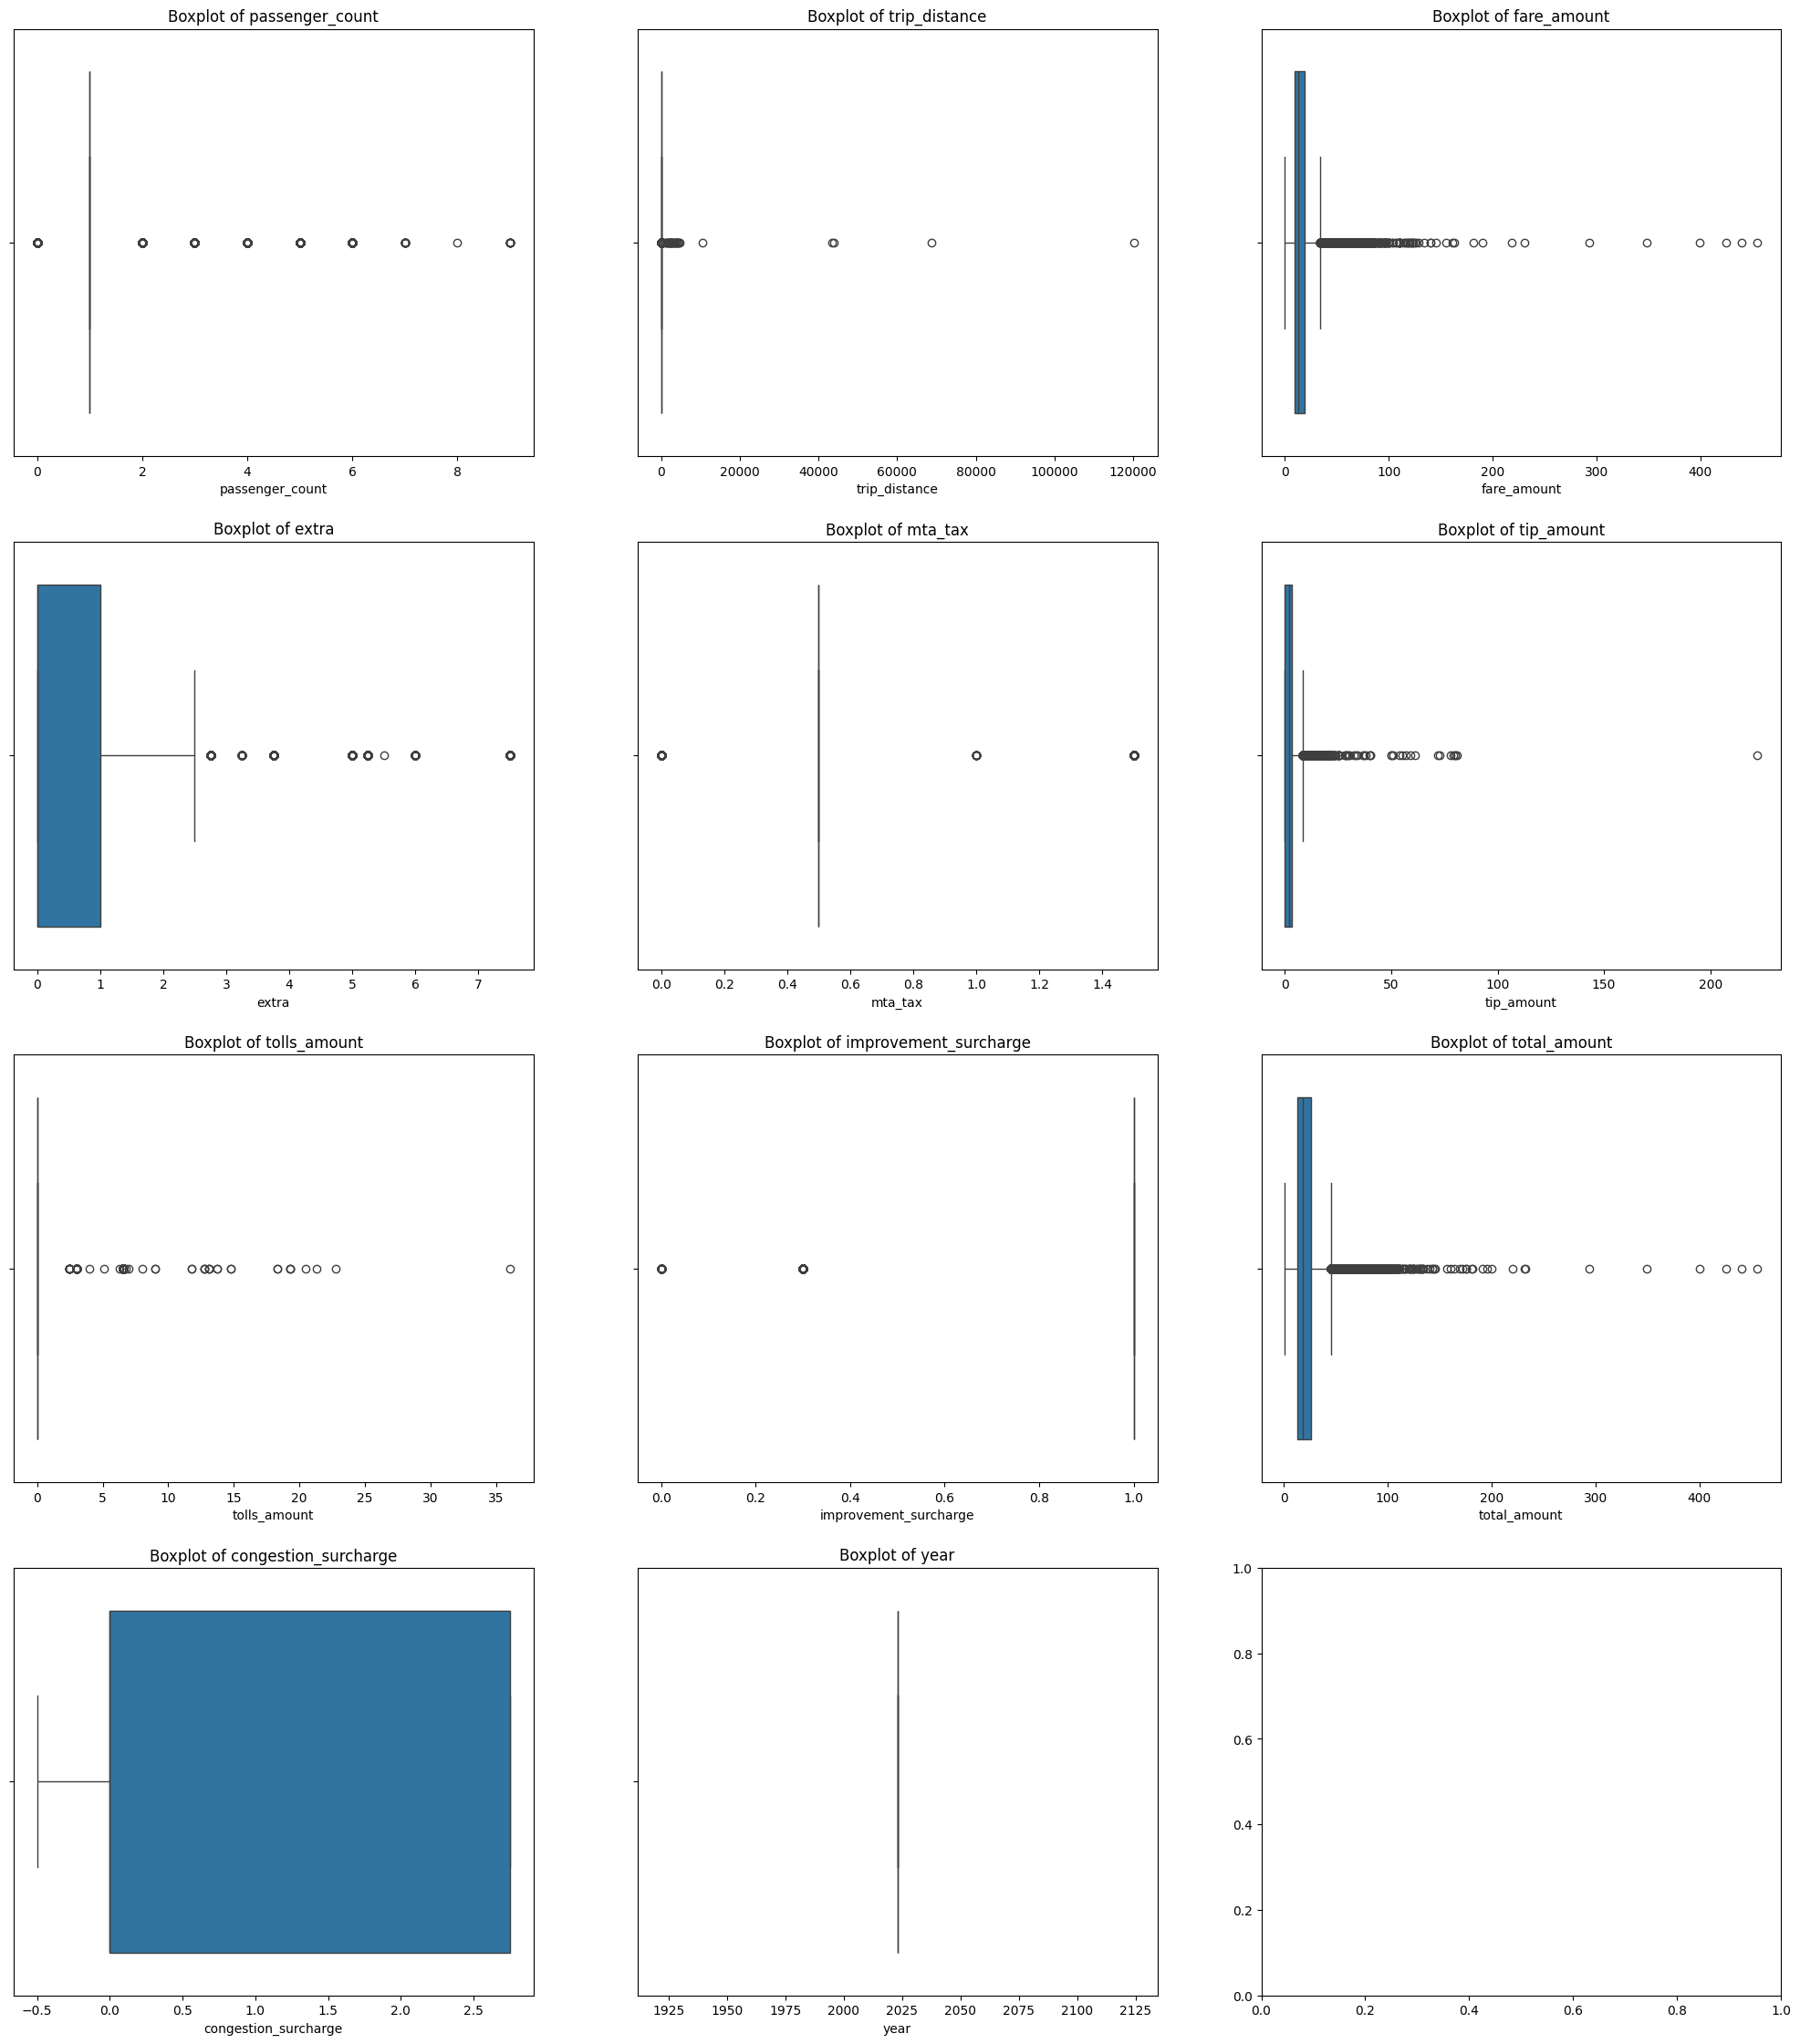

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,28))
for i, col in enumerate(numerical_column):
    sns.boxplot(x=df[col], ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Boxplot of {col}')
plt.show()

- Kita akan berfokus pada kolom atau variabel tip_amount dan total_amount untuk dihilangkan outlier nya

Handling outliers untuk kolom ***total_amount***

In [ ]:
# Hitung kuartil 1 dan 3
Q1 = df['total_amount'].quantile(0.25)
Q3 = df['total_amount'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 3 * IQR
boxplot_max = Q3 + 3 * IQR

In [ ]:
boxplot_max

64.92

- Karena outliers pada vairabel total_amount cukup ekstrem, kita akan melipatgandankan angka pengali ketika mencari boxplot max (upper bound), supaya tidak terlalu banyak data yang hilang
- Kita dapatkan bahwa batas atas atau upper bound dari variabel **total_amount** adalah 64.92 dan yang lebih dari ini dikategorikan sebagai outliers
- Akan tetapi kita juga harus mengecek berapa persen data yang akan hilang apabila kita menghilangkan data dengan total_amount yang lebih dari 64.92
- Apabila terlalu bannyak data yang hilang maka kita harus mencari alternatif yang lain

In [ ]:
df_outliers_drop = df.copy()
df_outliers_drop = df_outliers_drop[~(df_outliers_drop['total_amount']>64.92)]
df_outliers_drop

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough,year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1.0,2.58,14.90,...,1.0,24.18,1,1.0,2.75,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1.0,1.81,10.70,...,1.0,15.84,1,1.0,0.00,Bloomingdale,Manhattan,Central Park,Manhattan,2023
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1.0,1.30,6.50,...,1.0,10.20,1,1.0,0.00,Central Harlem,Manhattan,Upper West Side North,Manhattan,2023
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1.0,1.10,6.00,...,1.0,8.00,1,1.0,0.00,Central Harlem,Manhattan,East Harlem North,Manhattan,2023
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1.0,2.78,17.70,...,1.0,22.95,2,1.0,2.75,Central Harlem,Manhattan,Yorkville East,Manhattan,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68653,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1,49,62,1.0,4070.82,15.70,...,1.0,16.70,1,1,0.00,Clinton Hill,Brooklyn,Crown Heights South,Brooklyn,2023
68654,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1,10,205,1.0,2.14,4.41,...,1.0,5.41,1,1,0.00,Baisley Park,Queens,Saint Albans,Queens,2023
68655,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1,66,37,1.0,3.44,16.53,...,1.0,21.04,1,1,0.00,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,Brooklyn,2023
68656,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1,225,189,1.0,3.03,14.98,...,1.0,19.18,1,1,0.00,Stuyvesant Heights,Brooklyn,Prospect Heights,Brooklyn,2023


- Dari total 67693 data, terdapat 3890 data yang dibuang atau sekitar 5.7% saja data yang hilang
- Oleh karena itu kita bisa memutuskan untuk membuang 3890 data tersebut

<Axes: >

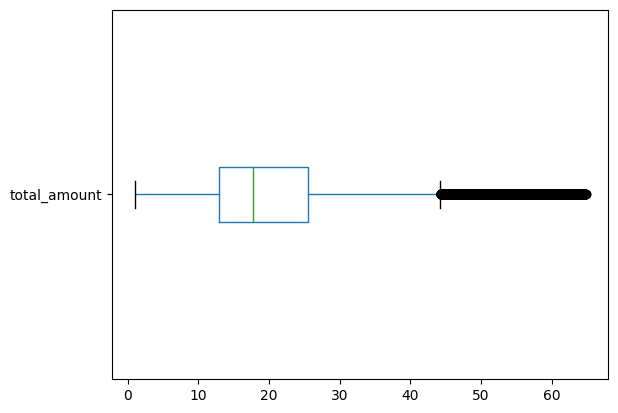

In [ ]:
df_outliers_drop.boxplot(column=['total_amount'], grid=False, vert=False)

- Sehingga boxplotnya akan menjadi seperti ini
- Masih terdapat outliers dengan kisaran nilai 40 keatas, disini saya memutuskan untuk membiarkan outliers tersebut karena jarak antar data sangat dekat dan sangat banyak.

Handling outliers untuk kolom ***trip_distance***

<Axes: >

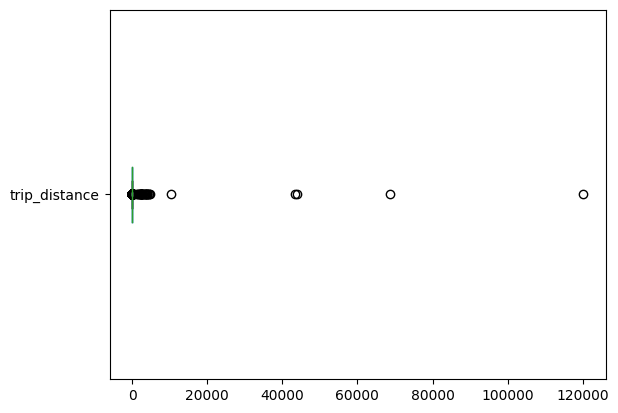

In [ ]:
df_outliers_drop.boxplot(column=['trip_distance'], grid=False, vert=False)

NOTES:

- Terdapat banyak outliers terutama untuk trip distance yang lebih dari 20.000
- Outliers tersebut bisa langsung kita buang

In [ ]:
df_outliers_drop = df_outliers_drop[~(df_outliers_drop['trip_distance']>50)]

<Axes: >

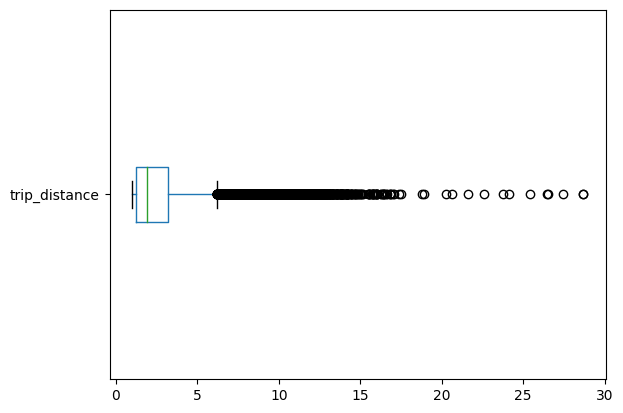

In [ ]:
df_outliers_drop.boxplot(column=['trip_distance'], grid=False, vert=False)

In [ ]:
df_outliers_drop = df_outliers_drop[~(df_outliers_drop['trip_distance']>40)]

<Axes: >

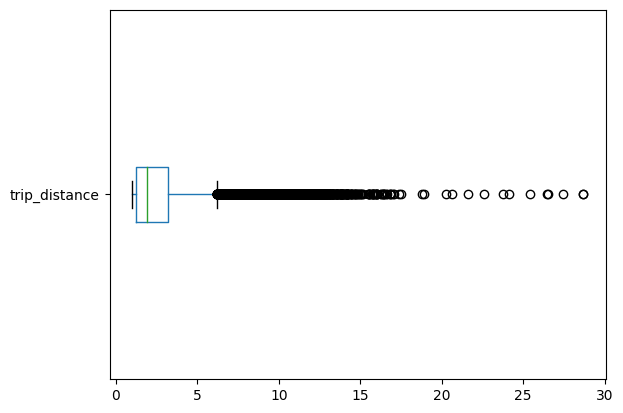

In [ ]:
df_outliers_drop.boxplot(column=['trip_distance'], grid=False, vert=False)

NOTES:

- Disini saya memutuskan untuk membuang ourliers diatas 40 saja, karena jarak antar data sudah agak merenggang.

# **FEATURE ENGINEERING**

- Pada tahap ini kita akan menambahkan kolom baru hasil dari ekstraksi kolom bertipe datetime
- kita akan menggunakan kolom lpep_pickup_datetime dan lpep_dropoff_datetime untuk diekstraksi menjadi kolom baru yaitu tanggal, waktu penjemputan, waktu drop off, dan lama perjalanan
- Hal ini dilakukan untuk membuat proses analisa lebih lanjut

In [ ]:
df_clean = df_outliers_drop.copy()
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough,year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1.0,2.58,14.90,...,1.0,24.18,1,1.0,2.75,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1.0,1.81,10.70,...,1.0,15.84,1,1.0,0.00,Bloomingdale,Manhattan,Central Park,Manhattan,2023
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1.0,1.30,6.50,...,1.0,10.20,1,1.0,0.00,Central Harlem,Manhattan,Upper West Side North,Manhattan,2023
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1.0,1.10,6.00,...,1.0,8.00,1,1.0,0.00,Central Harlem,Manhattan,East Harlem North,Manhattan,2023
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1.0,2.78,17.70,...,1.0,22.95,2,1.0,2.75,Central Harlem,Manhattan,Yorkville East,Manhattan,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68652,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1,75,186,1.0,3.92,20.72,...,0.3,25.02,1,1,2.75,East Harlem South,Manhattan,Penn Station/Madison Sq West,Manhattan,2023
68654,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1,10,205,1.0,2.14,4.41,...,1.0,5.41,1,1,0.00,Baisley Park,Queens,Saint Albans,Queens,2023
68655,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1,66,37,1.0,3.44,16.53,...,1.0,21.04,1,1,0.00,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,Brooklyn,2023
68656,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1,225,189,1.0,3.03,14.98,...,1.0,19.18,1,1,0.00,Stuyvesant Heights,Brooklyn,Prospect Heights,Brooklyn,2023


## Adding New Variabels/Columns

In [ ]:
# Membuat kolom baru berdasarkan kolom yang bertipe datetime

df_clean['trip_date'] = df_clean['lpep_pickup_datetime'].dt.date
df_clean['pick_up'] = df_clean['lpep_pickup_datetime'].dt.hour
df_clean['drop_off'] = df_clean['lpep_dropoff_datetime'].dt.time

# Membuat kolom trip duration
df_clean['trip_duration'] = df_clean['lpep_dropoff_datetime'] - df_clean['lpep_pickup_datetime']
df_clean['trip_duration_seconds'] = df_clean['trip_duration'].dt.total_seconds()
df_clean['trip_duration_time'] = pd.to_datetime(df_clean['trip_duration_seconds'], unit='s').dt.time

df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_borough,dropoff_zone,dropoff_borough,year,trip_date,pick_up,drop_off,trip_duration,trip_duration_seconds,trip_duration_time
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1.0,2.58,14.90,...,Manhattan,Lincoln Square West,Manhattan,2023,2023-01-01,0,00:37:11,0 days 00:11:01,661.0,00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1.0,1.81,10.70,...,Manhattan,Central Park,Manhattan,2023,2023-01-01,0,00:57:49,0 days 00:06:46,406.0,00:06:46
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1.0,1.30,6.50,...,Manhattan,Upper West Side North,Manhattan,2023,2023-01-01,0,00:19:03,0 days 00:05:49,349.0,00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1.0,1.10,6.00,...,Manhattan,East Harlem North,Manhattan,2023,2023-01-01,0,00:39:02,0 days 00:05:58,358.0,00:05:58
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1.0,2.78,17.70,...,Manhattan,Yorkville East,Manhattan,2023,2023-01-01,0,01:11:04,0 days 00:17:33,1053.0,00:17:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68652,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1,75,186,1.0,3.92,20.72,...,Manhattan,Penn Station/Madison Sq West,Manhattan,2023,2023-01-31,21,22:14:00,0 days 00:18:00,1080.0,00:18:00
68654,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1,10,205,1.0,2.14,4.41,...,Queens,Saint Albans,Queens,2023,2023-01-31,22,22:48:00,0 days 00:08:00,480.0,00:08:00
68655,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1,66,37,1.0,3.44,16.53,...,Brooklyn,Bushwick South,Brooklyn,2023,2023-01-31,23,00:02:00,0 days 00:16:00,960.0,00:16:00
68656,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1,225,189,1.0,3.03,14.98,...,Brooklyn,Prospect Heights,Brooklyn,2023,2023-01-31,23,23:19:00,0 days 00:18:00,1080.0,00:18:00


In [ ]:
# Convert the pickup datetime column to datetime format
df_clean['lpep_pickup_datetime'] = pd.to_datetime(df_clean['lpep_pickup_datetime'])

# Define rush hour and night trip conditions
rush_hour_morning_start = 7
rush_hour_morning_end = 9
rush_hour_evening_start = 16
rush_hour_evening_end = 19
night_trip_start = 23
night_trip_end = 5

# Create a function to determine if a trip is during rush hour or night trip
def categorize_trip(row):
    hour = row['lpep_pickup_datetime'].hour
    if rush_hour_morning_start <= hour < rush_hour_morning_end or rush_hour_evening_start <= hour < rush_hour_evening_end:
        return 'rush_hour'
    elif hour >= night_trip_start or hour < night_trip_end:
        return 'night_trip'
    else:
        return 'other'

# Apply the function to create a new column
df_clean['trip_category'] = df_clean.apply(categorize_trip, axis=1)

In [ ]:
# Separate the dataframe into rush hour and night trip categories
rush_hour_trips = df_clean[df_clean['trip_category'] == 'rush_hour']
night_trips = df_clean[df_clean['trip_category'] == 'night_trip']


In [ ]:
# menghapus kolom yang tidak diperlukan

df_clean = df_clean.drop(columns=['trip_duration','trip_duration_seconds'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63766 entries, 0 to 68657
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63766 non-null  object        
 1   lpep_pickup_datetime   63766 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63766 non-null  datetime64[ns]
 3   store_and_fwd_flag     63766 non-null  object        
 4   RatecodeID             63766 non-null  object        
 5   PULocationID           63766 non-null  object        
 6   DOLocationID           63766 non-null  object        
 7   passenger_count        63766 non-null  float64       
 8   trip_distance          63766 non-null  float64       
 9   fare_amount            63766 non-null  float64       
 10  extra                  63766 non-null  float64       
 11  mta_tax                63766 non-null  float64       
 12  tip_amount             63766 non-null  float64       
 13  tolls_

In [ ]:
df_clean['trip_date'] = pd.to_datetime(df_clean['trip_date'])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63766 entries, 0 to 68657
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63766 non-null  object        
 1   lpep_pickup_datetime   63766 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63766 non-null  datetime64[ns]
 3   store_and_fwd_flag     63766 non-null  object        
 4   RatecodeID             63766 non-null  object        
 5   PULocationID           63766 non-null  object        
 6   DOLocationID           63766 non-null  object        
 7   passenger_count        63766 non-null  float64       
 8   trip_distance          63766 non-null  float64       
 9   fare_amount            63766 non-null  float64       
 10  extra                  63766 non-null  float64       
 11  mta_tax                63766 non-null  float64       
 12  tip_amount             63766 non-null  float64       
 13  tolls_

In [ ]:
df_clean['trip_date'].min()

Timestamp('2023-01-01 00:00:00')

In [ ]:
df_clean['trip_date'].max()

Timestamp('2023-02-01 00:00:00')

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df_clean[['VendorID','store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']].describe()

,VendorID,store_and_fwd_flag,RatecodeID,payment_type,trip_type
count,63766,63766,63766,63766,63766
unique,2,2,5,4,3
top,2,N,1,1,1.0
freq,56075,63523,62971,41745,59118


## 1. Berapa jumlah Revenue yang tercarat di kedua vendor?

In [ ]:
# Filtering the data for payment types 1 and 2 (Credit card and Cash)
valid_payments = df_clean[df_clean['payment_type'].isin(['1', '2'])]

# Calculating the total revenue for Vendor 1 and Vendor 2 using total_amount
revenue_vendor_1 = valid_payments[valid_payments['VendorID'] == '1']['total_amount'].sum()
revenue_vendor_2 = valid_payments[valid_payments['VendorID'] == '2']['total_amount'].sum()

revenue_vendor_1, revenue_vendor_2

(144171.28999999998, 1165358.44)

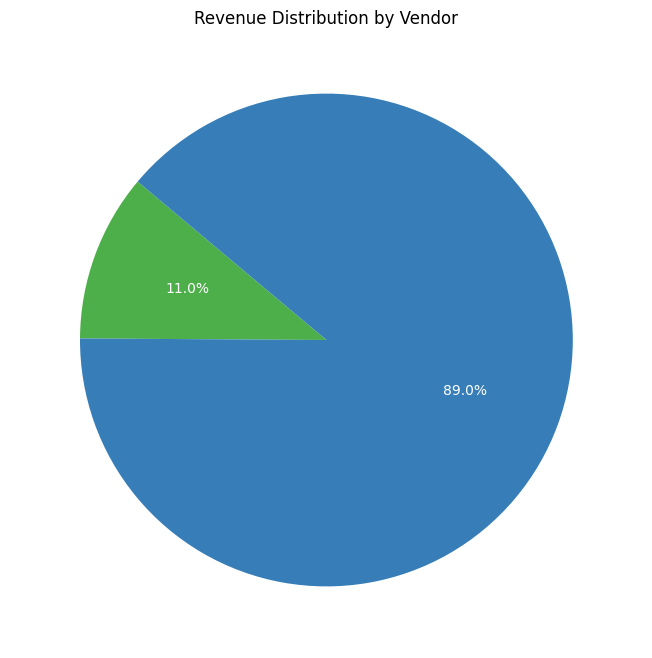

In [ ]:
# Prepare data for pie chart
labels = ['Vendor 1', 'Vendor 2']
revenues = [revenue_vendor_1, revenue_vendor_2]

# Generate a colormap with better contrast
colors = ['#4daf4a', '#377eb8']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenues, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color':"w"})
plt.title('Revenue Distribution by Vendor')
plt.show()

In [ ]:
# Filtering the data for payment types other than 1 and 2 (Credit card and Cash)
other_payments = df_clean[~df_clean['payment_type'].isin(['1', '2'])]

# Counting the number of each payment type for Vendor 1 and Vendor 2
payment_counts_vendor_1 = other_payments[other_payments['VendorID'] == '1']['payment_type'].value_counts()
payment_counts_vendor_2 = other_payments[other_payments['VendorID'] == '2']['payment_type'].value_counts()

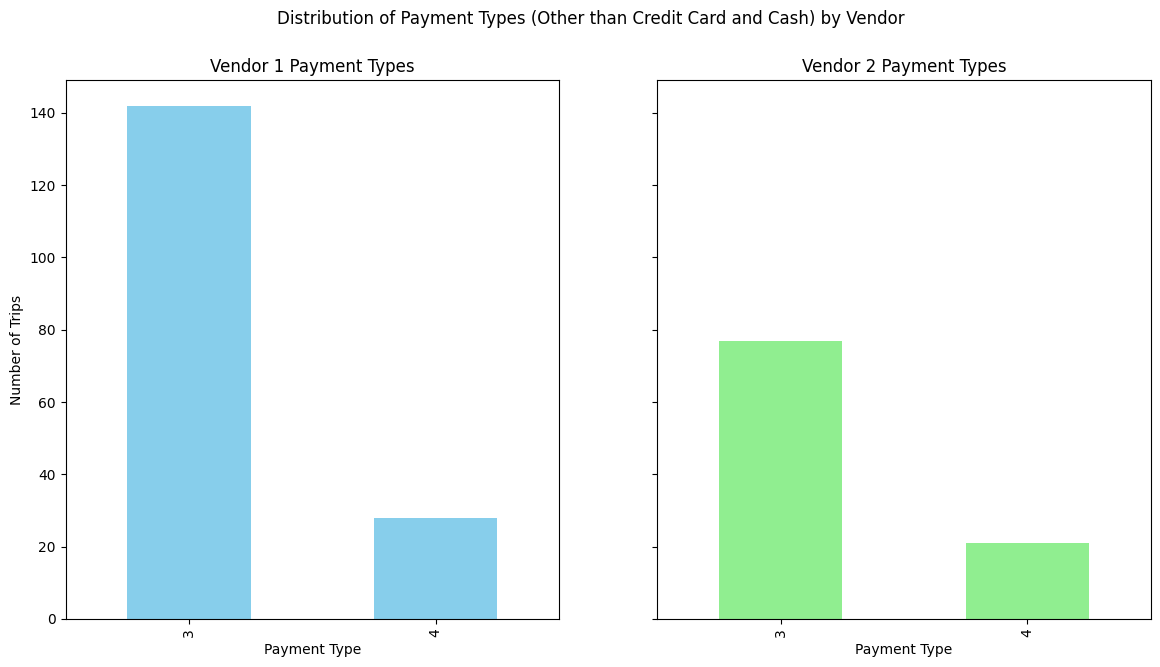

In [ ]:
# Create a bar plot for Vendor 1 and Vendor 2
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot for Vendor 1
payment_counts_vendor_1.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Vendor 1 Payment Types')
ax[0].set_xlabel('Payment Type')
ax[0].set_ylabel('Number of Trips')

# Plot for Vendor 2
payment_counts_vendor_2.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Vendor 2 Payment Types')
ax[1].set_xlabel('Payment Type')

plt.suptitle('Distribution of Payment Types (Other than Credit Card and Cash) by Vendor')
plt.show()

NOTES:

- Vendor 2 memiliki total 88.9% dari keseluruhan dengan jumlah USD 1,166,091.14
- Vendor 1 memiliki total 11.1% dari keseluruhan dengan jumlah USD 146,148.64

## 2. Berapa jumlah trip yang terjadi dan tercatat di kedua vendor?

In [ ]:
# Ubah tipe data kolom VendorID menjadi int
df_clean['VendorID'] = df_clean['VendorID'].astype(int)

# Calculate total revenue for each vendor
total_trip_vendor1 = df_clean[df_clean['VendorID'] == 1]['total_amount'].count()
total_trip_vendor2 = df_clean[df_clean['VendorID'] == 2]['total_amount'].count()

# Display the total revenue for each vendor
total_trip_vendor1, total_trip_vendor2

(7691, 56075)

In [ ]:
# Group by VendorID and trip_date and count the number of transactions for each group
daily_transactions = df_clean.groupby(['VendorID', 'trip_date']).size().reset_index(name='transaction_count')

# Pivot the data to have separate columns for each VendorID
daily_transactions_pivot = daily_transactions.pivot(index='trip_date', columns='VendorID', values='transaction_count').fillna(0)
daily_transactions_pivot

VendorID,1,2
trip_date,,
2023-01-01,141.0,1209.0
2023-01-02,186.0,1276.0
2023-01-03,255.0,1728.0
2023-01-04,271.0,1964.0
2023-01-05,275.0,1974.0
2023-01-06,281.0,2086.0
2023-01-07,235.0,1773.0
2023-01-08,176.0,1370.0
2023-01-09,263.0,1795.0


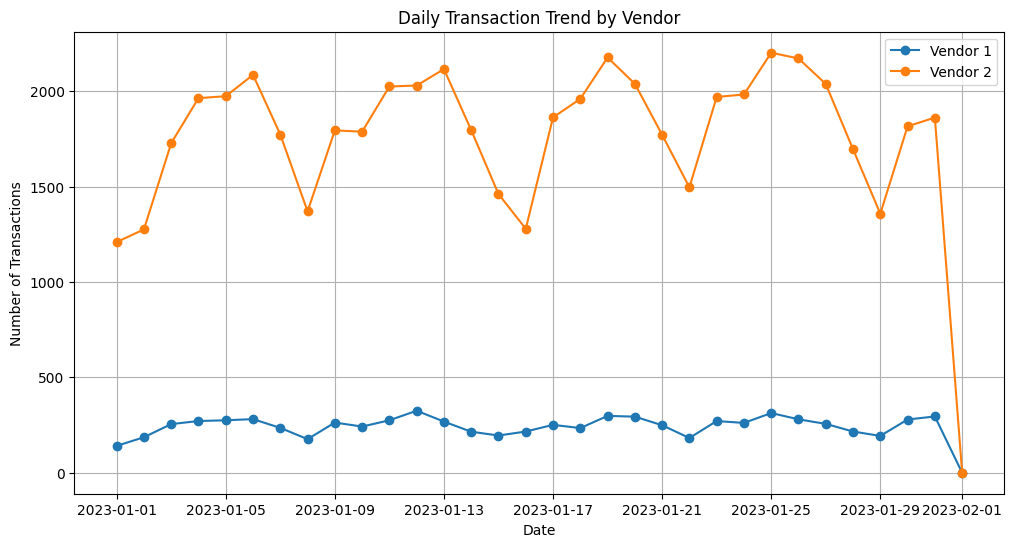

In [ ]:
# Plot the trendline for each vendor
plt.figure(figsize=(12, 6))
for vendor_id in daily_transactions_pivot.columns:
    plt.plot(daily_transactions_pivot.index, daily_transactions_pivot[vendor_id], marker='o', label=f'Vendor {vendor_id}')

plt.title('Daily Transaction Trend by Vendor')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()

## 10 zona dengan total trip terbayak

<ipython-input-86-9dccdf6ca3ad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_pickup_zones_vendor1.values, y=top_10_pickup_zones_vendor1.index, palette="viridis")
<ipython-input-86-9dccdf6ca3ad>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_pickup_zones_vendor2.values, y=top_10_pickup_zones_vendor2.index, palette="viridis")


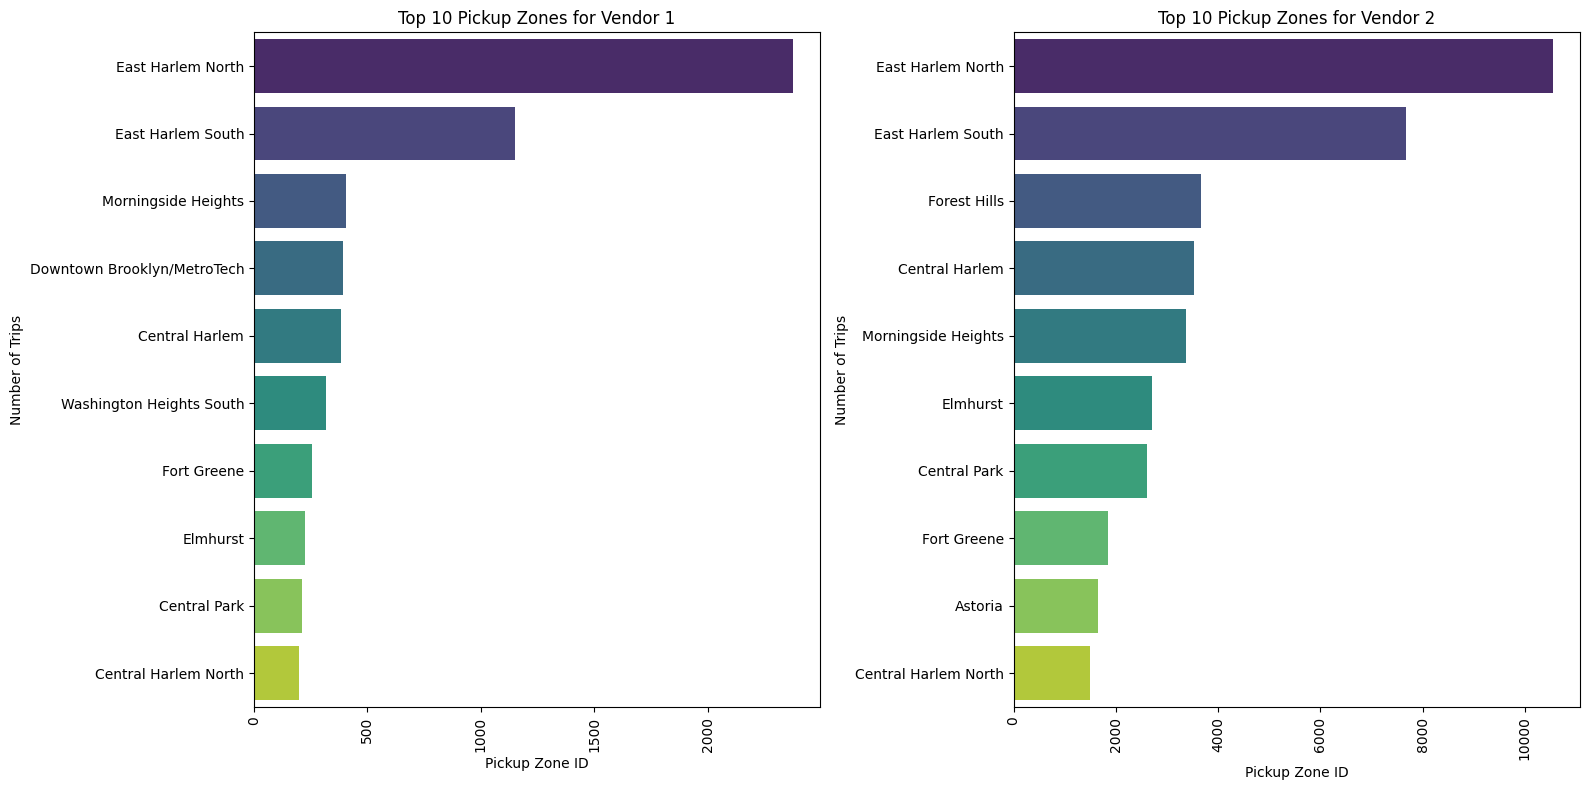

In [ ]:
# Hitung jumlah trip untuk setiap PULocationID untuk Vendor 1
top_10_pickup_zones_vendor1 = df_clean[df_clean['VendorID'] == 1]['pickup_zone'].value_counts().head(10)

# Hitung jumlah trip untuk setiap PULocationID untuk Vendor 2
top_10_pickup_zones_vendor2 = df_clean[df_clean['VendorID'] == 2]['pickup_zone'].value_counts().head(10)

# Plot the visualizations
plt.figure(figsize=(16, 8))

# Plot for Vendor 1
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_pickup_zones_vendor1.values, y=top_10_pickup_zones_vendor1.index, palette="viridis")
plt.title('Top 10 Pickup Zones for Vendor 1')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)

# Plot for Vendor 2
plt.subplot(1, 2, 2)
sns.barplot(x=top_10_pickup_zones_vendor2.values, y=top_10_pickup_zones_vendor2.index, palette="viridis")
plt.title('Top 10 Pickup Zones for Vendor 2')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Total Trip Per Category

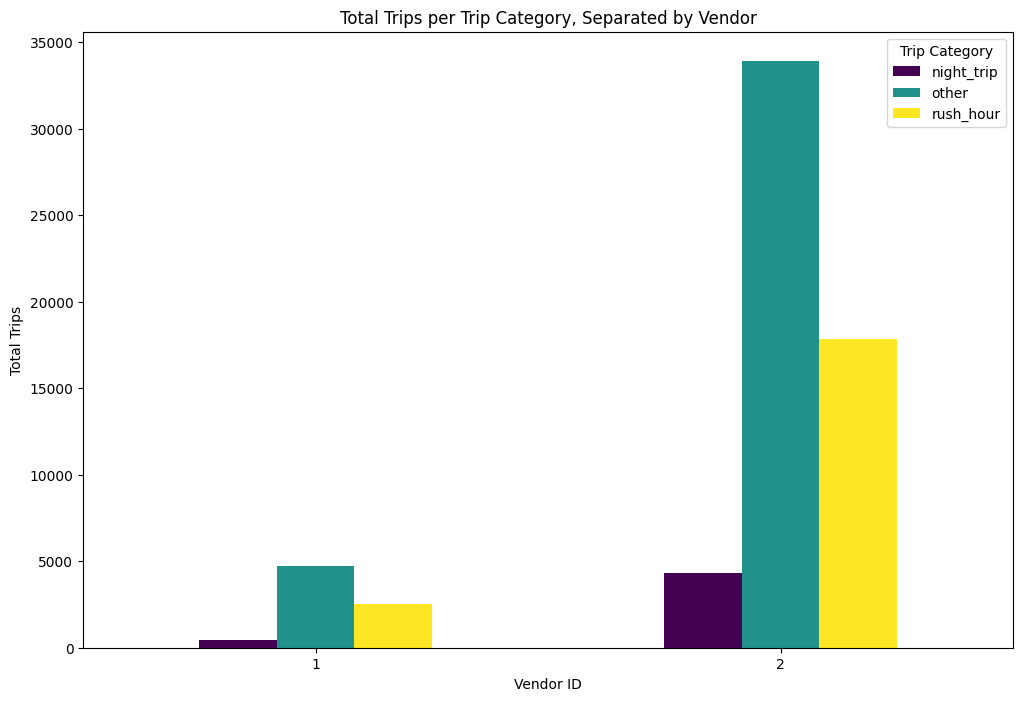

In [ ]:
# Group by VendorID and trip_category, then count the number of trips
trip_category_counts = df_clean.groupby(['VendorID', 'trip_category']).size().unstack()

# Plot total trips per trip category, separated by vendor
trip_category_counts.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Total Trips per Trip Category, Separated by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Total Trips')
plt.legend(title='Trip Category')
plt.xticks(rotation=0)
plt.show()

# **STATISTICAL TEST**

## Trip Distance For Passenger's Preference

1. Melihat bagaimana karakteristik penumpang berdasarkan perjalanan yang ditempuh yang tercatat pada kedua vendor.
2. Kita juga akan melihat apakah ada perbedaan jarak perjalanan yang tercatat pada vendor 1 dan vendor 2, sehingga bisa menjadi dasar untuk NYC TLC dalam menentukan layanan baru yang sesuai dengan kebiasaan pelanggan.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63766 entries, 0 to 68657
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63766 non-null  int64         
 1   lpep_pickup_datetime   63766 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63766 non-null  datetime64[ns]
 3   store_and_fwd_flag     63766 non-null  object        
 4   RatecodeID             63766 non-null  object        
 5   PULocationID           63766 non-null  object        
 6   DOLocationID           63766 non-null  object        
 7   passenger_count        63766 non-null  float64       
 8   trip_distance          63766 non-null  float64       
 9   fare_amount            63766 non-null  float64       
 10  extra                  63766 non-null  float64       
 11  mta_tax                63766 non-null  float64       
 12  tip_amount             63766 non-null  float64       
 13  tolls_

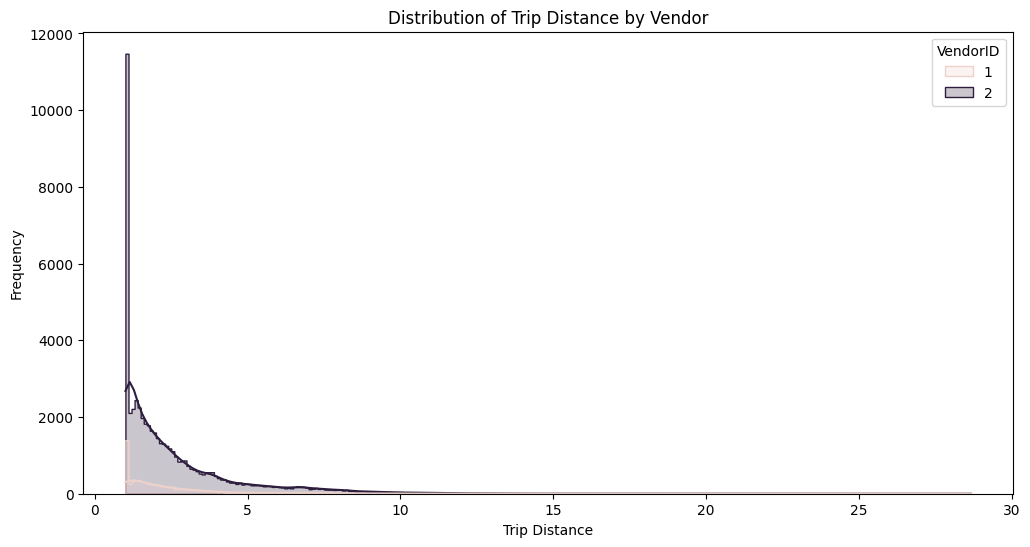

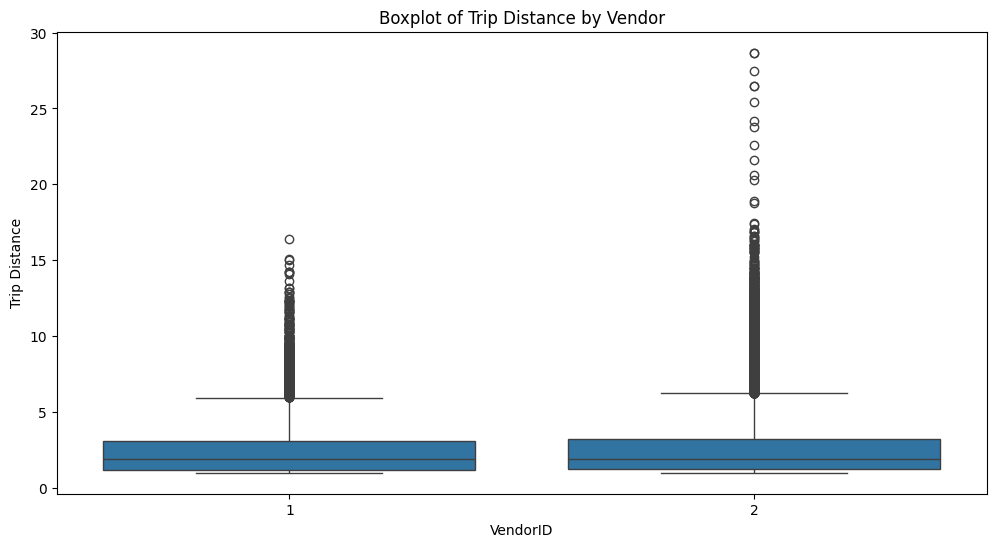

In [ ]:
# Analisis Deskriptif
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='trip_distance', hue='VendorID', kde=True, element="step")
plt.title('Distribution of Trip Distance by Vendor')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='VendorID', y='trip_distance', data=df_clean)
plt.title('Boxplot of Trip Distance by Vendor')
plt.xlabel('VendorID')
plt.ylabel('Trip Distance')
plt.show()

NOTE:

- Bisa kita ketahui disini bahwa persebaran data untuk kedua vendor cukup bervariasi dan juga tidak berdistribusi normal. Jika dilihat dari boxplot, kedua vendor berdistribusi positively skewed, yang berarti mean atau rata-rata ditarik ke kanan menuju outliers sehingga mean akan lebih besar dari median.
- Pada kasus dataset yang tidak berdistribusi normal seperti ini, maka kita akan memakai uji statistik non parametrik.

In [ ]:
# Filter data untuk Vendor 1
vendor1_data = df_clean[df_clean['VendorID'] == 1]
# Filter data untuk Vendor 2
vendor2_data = df_clean[df_clean['VendorID'] == 2]

# Uji Statistik (Mann-Whitney U Test)
vendor1_distance = df_clean[df_clean['VendorID'] == 1]['trip_distance']
vendor2_distance = df_clean[df_clean['VendorID'] == 2]['trip_distance']

mannwhitney_result = mannwhitneyu(vendor1_distance, vendor2_distance)
print("Mann-Whitney U Test Result:", mannwhitney_result)

Mann-Whitney U Test Result: MannwhitneyuResult(statistic=211657623.0, pvalue=0.008411558582896547)


INSIGHT:

- Setelah dicek secara statistik dengan uji non-parametrik, pvalue yang didapat adalah < 0.05. Bisa kita simpulkan bahwasanya terdapat perbedaan trip distance yang ditempuh oleh vendor 1 dan vendor 2. Dimana Vendor 2 lebih sering mengantar penumpang dengan trip distance yang lebih jauh.
- Hal ini membuktikan bahwasanya taxi yang dilacak oleh vendor 1 menempuh perjalanan yang lebih dekat jika dibandingkan dengan taxi yang dilacak dengan vendor 2.

## Total Trip By RatecodeID Vendor 1 Vs Vendor 2

In [ ]:
# Calculate the total trip count based on RatecodeID for both vendors
vendor_trip_counts = df_clean.groupby(['VendorID', 'RatecodeID']).size().reset_index(name='trip_count')
vendor_trip_counts

,VendorID,RatecodeID,trip_count
0,1,1,7649
1,1,3,2
2,1,4,2
3,1,5,38
4,2,1,55322
5,2,2,2
6,2,3,4
7,2,5,747


NOTES:

- Dari tabel diatas bisa kita ketahui bahwa mayoritas trip ditetapkan untuk ratecodeID 1 yaitu Standard Rate dan ratecodeID yang lain namun jumlahnya sangat sedikit.

In [ ]:
# Create a function to adjust the RatecodeID
def adjust_ratecode(row):
    if (row['pickup_zone'] == 'JFK Airport') or (row['dropoff_zone'] == 'JFK Airport'):
        return 2  # JFK Airport
    elif (row['pickup_zone'] == 'Newark Airport') or (row['dropoff_zone'] == 'Newark Airport'):
        return 3  # Newark Airport
    elif (row['pickup_zone'] in ['Nassau', 'Westchester']) or (row['dropoff_zone'] in ['Nassau', 'Westchester']):
        return 4  # Nassau or Westchester
    else:
        return row['RatecodeID']

# Apply the function to create a new column with the adjusted RatecodeID
df_clean['adjusted_ratecodeID'] = df_clean.apply(adjust_ratecode, axis=1)


In [ ]:
df_clean['adjusted_ratecodeID'] = df_clean['adjusted_ratecodeID'].astype(str)

In [ ]:
# Summarize the counts of adjusted RatecodeID for each VendorID and sort by VendorID and adjusted RatecodeID
adjusted_ratecode_vendor_counts = df_clean.groupby(['VendorID', 'adjusted_ratecodeID']).size().reset_index(name='trip_count')
adjusted_ratecode_vendor_counts_sorted = adjusted_ratecode_vendor_counts.sort_values(by=['VendorID', 'adjusted_ratecodeID']).reset_index(drop=True)

adjusted_ratecode_vendor_counts_sorted

,VendorID,adjusted_ratecodeID,trip_count
0,1,1,7641
1,1,2,8
2,1,3,2
3,1,4,2
4,1,5,38
5,2,1,55091
6,2,2,259
7,2,3,4
8,2,5,721


NOTES:

- Tetapi setelah dicek kembali berdasarkan pickup_zone dan dropoff_zone, ada beberapa trip yang mengalami kesalahan penetapan ratecodeID yang dicatat oleh vendor 1 maupun 2. Perjalanan baik yang menuju atau berangkat dari JFK Airport ditetapkan menjadi Standard rate dan tidak menggunakan JFK Airport Rate.
- Kita akan coba mengetes secara statistik apakah ada perbedaan antara fare amount per distance yang ditetapkan untuk perjalanan antara Standard Rate, JFK Airport Rate.


## Fare Amount per Distance Standard Rate Vs JFK Airport Rate

1. Menganalisa fare per trip per distance dari kedua ratecodeID untuk analisa yang lebih objektif. Karena jika kita menganalisa dari hasil total amount, variabel tersebut merupakan variabel hasil penjumlahan dari variabel lain, sehingga terdapat pengaruh dari variabel selain dari total amount itu sendiri yang mengakibatkan analisa menjadi bias.
2. Bagaimana fare per trip per distance yang ditetapkan untuk kedua ratecodeID?
2. Apakah ada perbedaan fare amount per distance untuk kedua ratecodeID sehingga menyebabkan charge fee/total amount yang tidak fair?

In [ ]:
df_clean['fare_per_distance'] = df_clean['fare_amount'] / df_clean['trip_distance']

# Filter data for adjusted_ratecodeID 1 and adjusted_ratecodeID 2
fare_per_distance_adj_1 = df_clean[df_clean['adjusted_ratecodeID'] == '1']['fare_per_distance']
fare_per_distance_adj_2 = df_clean[df_clean['adjusted_ratecodeID'] == '2']['fare_per_distance']

# If the number of samples for adjusted_ratecodeID 1 exceeds 5000, randomly sample 5000
if len(fare_per_distance_adj_1) > 5000:
    fare_per_distance_adj_1 = fare_per_distance_adj_1.sample(5000, random_state=42)

if len(fare_per_distance_adj_2) > 5000:
    fare_per_distance_adj_2 = fare_per_distance_adj_2.sample(5000, random_state=42)

# Perform Shapiro-Wilk test for normality
shapiro_adj_1 = shapiro(fare_per_distance_adj_1)
shapiro_adj_2 = shapiro(fare_per_distance_adj_2)

shapiro_adj_1,shapiro_adj_2

(ShapiroResult(statistic=0.8178481459617615, pvalue=0.0),
 ShapiroResult(statistic=0.1494261622428894, pvalue=6.197859351583775e-33))

In [ ]:
# Perform one-sided Mann-Whitney U test to check if fare per distance for adjusted_ratecodeID 1 is greater than adjusted_ratecodeID 2
mannwhitney_result_adj_onesided = mannwhitneyu(fare_per_distance_adj_1, fare_per_distance_adj_2, alternative='greater')

# Display results
mannwhitney_results_adj_onesided = {
    "Statistic": mannwhitney_result_adj_onesided[0],
    "p-value": mannwhitney_result_adj_onesided[1]}

mannwhitney_results_adj_onesided

{'Statistic': 1236842.0, 'p-value': 1.3076687340950265e-122}

In [ ]:
# Hitung rata-rata fare per distance untuk masing-masing vendor
median_fare_per_distance_adj1 = fare_per_distance_adj_1.median()
median_fare_per_distance_adj2 = fare_per_distance_adj_2.median()

# Tampilkan rata-rata fare per distance
print("Median Fare per Distance for Standard Rate: $", round(median_fare_per_distance_adj1, 2))
print("Median Fare per Distance for JFK Trip: $", round(median_fare_per_distance_adj2, 2))

Median Fare per Distance for Standard Rate: $ 6.42
Median Fare per Distance for JFK Trip: $ 4.25


Notes:

- Secara uji statistik kita dapati bahwa fare amount per distance yang ditetapkan untuk Standard Rate lebih mahal dari pada untuk JFK Rate.
- Hal ini akan mengakibatkan penumpang akan membayar dengan harga lebih mahal ketika melakukan perjalanan ke JFK Airport dari pada harga yang seharusnya.
- Sehingga akan menimbulkan penetapan harga yang tidak fair untuk penumpang-penumpang selanjutnya.

## Fare Amount per Distance Vendor 1 Vs Vendor 2

1. Menganalisa fare per trip dari kedua vendor untuk analisa yang lebih objektif. Karena jika kita menganalisa dari hasil total amount, variabel tersebut merupakan variabel hasil penjumlahan dari variabel lain, sehingga terdapat pengaruh dari variabel selain dari total amount itu sendiri yang mengakibatkan analisa menjadi bias.
2. Bagaimana fare per trip yang ditetapkan untuk kedua vendor?
2. Apakah ada perbedaan rata-rata fare amount per distance untuk kedua vendor sehingga penumpang lebih banyak memilih vendor 2

In [ ]:
# Pastikan nilai distance tidak nol untuk menghindari pembagian dengan nol
df_clean = df_clean[df_clean['trip_distance'] > 0]

# Hitung fare amount per distance
df_clean['fare_per_distance'] = df_clean['fare_amount'] / df_clean['trip_distance']

In [ ]:
# Ambil sampel acak dari kedua grup dengan ukuran yang sama
vendor1_fare = df_clean[df_clean['VendorID'] == 1]['fare_per_distance']
vendor2_fare = df_clean[df_clean['VendorID'] == 2]['fare_per_distance']

# If the number of samples for adjusted_ratecodeID 1 exceeds 5000, randomly sample 5000
if len(vendor1_fare) > 5000:
    vendor1_fare = vendor1_fare.sample(5000, random_state=42)

# If the number of samples for adjusted_ratecodeID 1 exceeds 5000, randomly sample 5000
if len(vendor2_fare) > 5000:
    vendor2_fare = vendor2_fare.sample(5000, random_state=42)

In [ ]:
# Uji normalitas untuk fare_per_distance Vendor 1
# Perform Shapiro-Wilk test for normality

shapiro_vendor1_fare = shapiro(vendor1_fare)
print("Shapiro-Wilk Test for Vendor 1 Fare per Distance:", shapiro_vendor1_fare)

# Uji normalitas untuk fare_per_distance Vendor 2
shapiro_vendor2_fare = shapiro(vendor2_fare)

print("Shapiro-Wilk Test for Vendor 2 Fare per Distance:", shapiro_vendor2_fare)

Shapiro-Wilk Test for Vendor 1 Fare per Distance: ShapiroResult(statistic=0.8187982439994812, pvalue=0.0)
Shapiro-Wilk Test for Vendor 2 Fare per Distance: ShapiroResult(statistic=0.7156741619110107, pvalue=0.0)


In [ ]:
# Lakukan uji Mann-Whitney untuk membandingkan fare per distance antara Vendor 1 dan Vendor 2
mannwhitney_vendor1_vs_vendor2 = mannwhitneyu(vendor1_fare, vendor2_fare)

# Tampilkan hasil uji Mann-Whitney
print("Mann-Whitney U Test Vendor 1 vs Vendor 2 Fare per Distance:", mannwhitney_vendor1_vs_vendor2)

Mann-Whitney U Test Vendor 1 vs Vendor 2 Fare per Distance: MannwhitneyuResult(statistic=10243590.5, pvalue=4.354849936943062e-55)


In [ ]:
# Hitung rata-rata fare per distance untuk masing-masing vendor
median_fare_per_distance_vendor1 = vendor1_fare.median()
median_fare_per_distance_vendor2 = vendor2_fare.median()

# Tampilkan rata-rata fare per distance
print("Median Fare per Distance for Vendor 1: $", round(median_fare_per_distance_vendor1, 2))
print("Median Fare per Distance for Vendor 2: $", round(median_fare_per_distance_vendor2, 2))

Median Fare per Distance for Vendor 1: $ 6.0
Median Fare per Distance for Vendor 2: $ 6.46


INSIGHT:

Meskipun secara harga per mil untuk taxi yang dilacak dengan vendor 2 sedikit lebih mahal, tetapi para penumpang tetap memilih vendor 2 dari pada vendor 1. Hal ini mungkin disebabkan karena:
1. Jumlah unit armada yang beroperasi untuk vendor 1 lebih sedikit dari pada vendor 2.
2. Terdapat variabel lain yang mempengaruhi harga total_amount sehingga menyebabkan kenaikan harga juga. Sehingga harga fare amount menjadi kurang relevan.

## Extra Fee Vendor 1 vs Vendor 2

-  Setelah mengecek fare amount per distance (mil), ternyata trip distance untuk vendor 1 lebih murah daripada vendor 2. Tetapi penumpang tetap memilih vendor 2 yang memiliki harga per distance (mil) lebih mahal.
- Kita akan mengecek satu variabel lain, yaitu variabel extra, yang akan berdampak pada harga akhir dari sebuah trip.

In [ ]:
# Filter data untuk Vendor 1
vendor1_extra = df_clean[df_clean['VendorID'] == 1]['extra']
# Filter data untuk Vendor 2
vendor2_extra = df_clean[df_clean['VendorID'] == 2]['extra']

# If the number of samples for adjusted_ratecodeID 1 exceeds 5000, randomly sample 5000
if len(vendor1_extra) > 5000:
    vendor1_extra = vendor1_extra.sample(5000, random_state=42)

# If the number of samples for adjusted_ratecodeID 1 exceeds 5000, randomly sample 5000
if len(vendor2_extra) > 5000:
    vendor2_extra = vendor2_extra.sample(5000, random_state=42)


In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_vendor1_extra = shapiro(vendor1_extra)
shapiro_vendor2_extra = shapiro(vendor2_extra)

# Display the Shapiro-Wilk test results
print("Shapiro-Wilk Test results for Vendor 1 Extra (Sample)")
print(f"Stat={shapiro_vendor1_extra[0]}, P-value={shapiro_vendor1_extra[1]}")

print("\nShapiro-Wilk Test results for Vendor 2 Extra (Sample)")
print(f"Stat={shapiro_vendor2_extra[0]}, P-value={shapiro_vendor2_extra[1]}")

Shapiro-Wilk Test results for Vendor 1 Extra (Sample)
Stat=0.798912763595581, P-value=0.0

Shapiro-Wilk Test results for Vendor 2 Extra (Sample)
Stat=0.6645159721374512, P-value=0.0


In [ ]:
# Perform appropriate statistical test based on normality results
if shapiro_vendor1_extra[1] > 0.05 and shapiro_vendor2_extra[1] > 0.05:
    # If both distributions are normal, use t-test
    stat, p_value = ttest_ind(vendor1_extra, vendor2_extra)
    test_name = "T-test"
else:
    # If distributions are not normal, use Mann-Whitney U test
    stat, p_value = mannwhitneyu(vendor1_extra, vendor2_extra, alternative='greater')
    test_name = "Mann-Whitney U test"

# Display the statistical test results
print(f"\n{test_name} results for Vendor 1 vs Vendor 2 Extra (Sample)")
print(f"Stat={stat}, P-value={p_value}")


Mann-Whitney U test results for Vendor 1 vs Vendor 2 Extra (Sample)
Stat=15610418.0, P-value=5.215547423141455e-121


In [ ]:
# Hitung rata-rata fare per distance untuk masing-masing vendor
median_extra_vendor1 = vendor1_extra.median()
median_extra_vendor2 = vendor2_extra.median()

# Tampilkan rata-rata fare per distance
print("Median Fare per Distance for Vendor 1: $", round(median_extra_vendor1, 2))
print("Median Fare per Distance for Vendor 2: $", round(median_extra_vendor2, 2))

Median Fare per Distance for Vendor 1: $ 1.0
Median Fare per Distance for Vendor 2: $ 0.0


INSIGHT:

- Bisa kita simpulkan bahwasanya variabel/kolom extra berpengaruh signifikan terhadap perbedaan yang terjadi antara extra fee yang perlu dibayar oleh penumpang untuk kedua vendor.
- Kendaraan yang dilacak dengan vendor 1 memiliki extra fee yang lebih mahal daripada kendaraan yang dilacak dengan vendor 2. Hal ini bisa kita jadikan salah satu asumsi dasar penyebab kenapa total trip lebih banyak terjadi pada vendor 2

## Rush Hour, Night Hour, and Others Trip



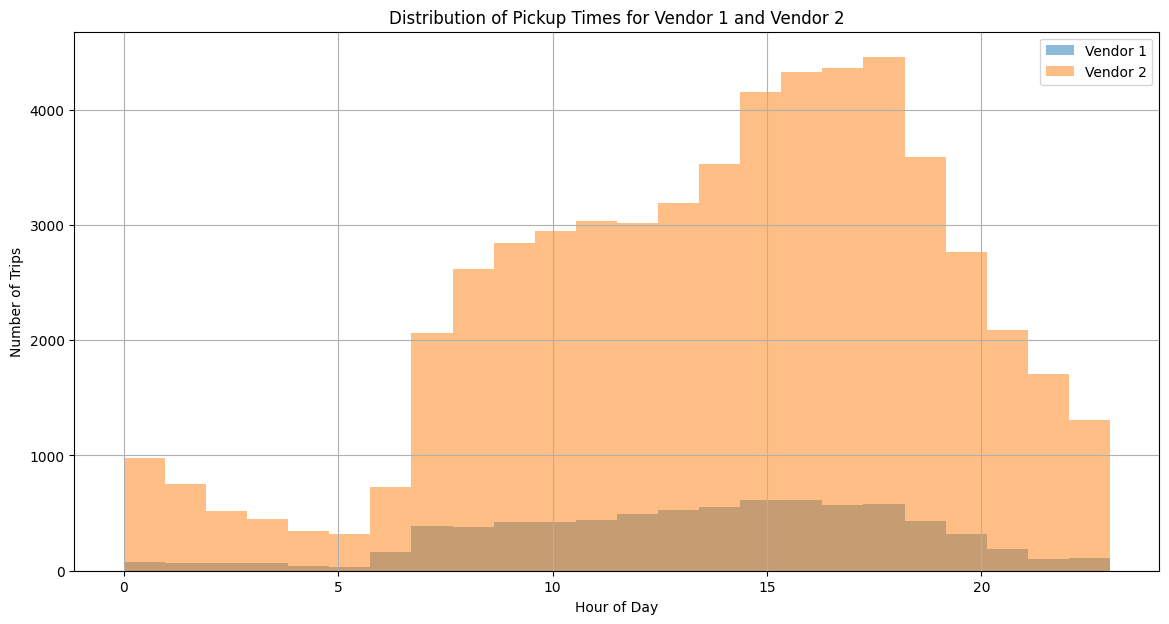

In [ ]:
# Plot distribusi jam pickup untuk kedua vendor
plt.figure(figsize=(14, 7))
plt.hist(df_clean[df_clean['VendorID'] == 1]['pick_up'], bins=24, alpha=0.5, label='Vendor 1')
plt.hist(df_clean[df_clean['VendorID'] == 2]['pick_up'], bins=24, alpha=0.5, label='Vendor 2')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Pickup Times for Vendor 1 and Vendor 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# Ensure the pickup_datetime column is in datetime format
df_clean['lpep_pickup_datetime'] = pd.to_datetime(df_clean['lpep_pickup_datetime'])

# Extract hour from pickup datetime
df_clean['pickup_hour'] = df_clean['lpep_pickup_datetime'].dt.hour

# Calculate the average total trips per hour for one week
average_trips_per_hour = df_clean['pickup_hour'].value_counts().sort_index() / df_clean['lpep_pickup_datetime'].dt.dayofyear.nunique()

# Prepare data for visualization
hours_of_day = range(24)
average_trips_per_hour.index = hours_of_day

In [ ]:
# Extract day of the week from pickup datetime
df_clean['pickup_dayofweek'] = df_clean['lpep_pickup_datetime'].dt.dayofweek

# Calculate the average total trips per day for one week
average_trips_per_day = df_clean['pickup_dayofweek'].value_counts().sort_index() / df_clean['lpep_pickup_datetime'].dt.isocalendar().week.nunique()

# Prepare data for visualization
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_trips_per_day.index = days_of_week

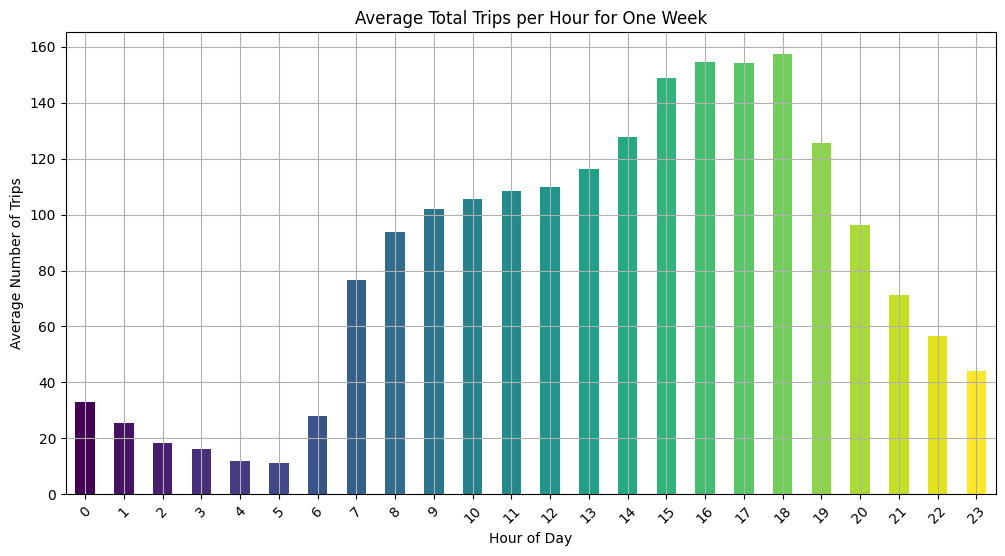

In [ ]:
# Generate viridis colormap
colormap = plt.get_cmap('viridis')
colors = colormap(np.linspace(0, 1, len(average_trips_per_hour)))

# Plot the average total trips per hour for one week
plt.figure(figsize=(12, 6))
average_trips_per_hour.plot(kind='bar', color=colors)
plt.title('Average Total Trips per Hour for One Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

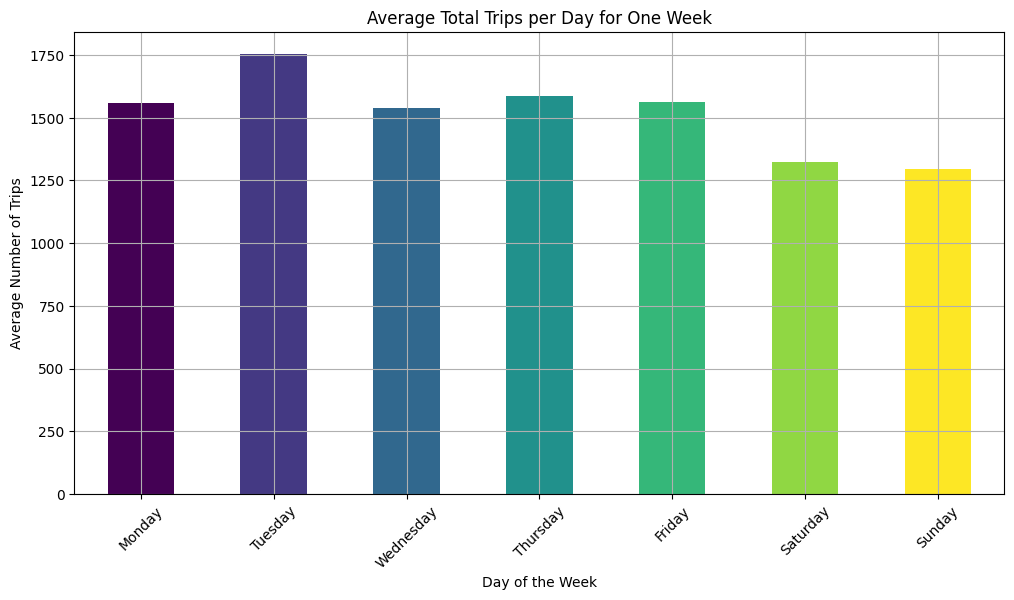

In [ ]:
# Generate viridis colormap
colormap = plt.get_cmap('viridis')
colors = colormap(np.linspace(0, 1, len(average_trips_per_day)))

# Plot the average total trips per day for one week
plt.figure(figsize=(12, 6))
average_trips_per_day.plot(kind='bar', color=colors)
plt.title('Average Total Trips per Day for One Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **CONCLUSION AND RECOMMENDATION**

**CONCLUSION**

**1. Kendaraan atau taxi yang di lacak menggunakan vendor 1 memiliki karakteristik perjalanan dari penumpang sebagai berikut:**
- Jarak tempuh yang dilalui lebih dekat dari pada kendaraan yang dilacak menggunakan vendor 2. Sehingga ada kemungkinan kendaraan ini tidak menerima perjalanan dengan trip distance yang lebih jauh.
- Berdasarkan Rate Code ID atau penetapan harga akhir, kendaraan dengan vendor 1 lebih banyak mendapatkan perjalanan yang menggunakan Standard Rate dari pada rate yang lainya.
- Fare Amount Per Distance ataupun Harga per mil pada kendaraan yang dilacak oleh vendor 1 cenderung lebih murah dibandingkan vendor 2. Namun, kendaraan dari vendor 1 mungkin membebankan biaya tambahan yang lebih tinggi. Hal ini bisa menjadi salah satu alasan mengapa jumlah perjalanan dengan vendor 1 lebih sedikit, karena penumpang cenderung menghindari kendaraan dengan biaya tambahan yang lebih tinggi.

**2. Karakteristik perjalanan penumpang berdasarkan waktu dan hari beroperasi adalah sebagai berikut:**
- **Jam Sibuk (Peak Hours):**
<br>
Puncak jumlah trip terjadi antara pukul 15:00 dan 18:00, dengan jumlah trip tertinggi sekitar pukul 18:00.
Ini menunjukkan bahwa waktu sore hingga awal malam adalah periode dengan aktivitas tertinggi untuk perjalanan taksi, kemungkinan karena banyak orang pulang kerja atau beraktivitas setelah jam kerja.
- **Jam Tenang (Off-Peak Hours):**
<br>
Jumlah trip paling rendah terjadi antara pukul 2:00 hingga 5:00 pagi. Aktivitas perjalanan taksi cenderung berkurang secara signifikan pada dini hari, yang bisa disebabkan oleh kurangnya permintaan pada waktu tersebut.
<br>
- **Hari dengan Jumlah Trip Tertinggi:**
<br>
Selasa adalah hari dengan jumlah trip tertinggi.Kamis juga menunjukkan jumlah trip yang tinggi, mendekati jumlah trip pada hari Selasa.
- **Hari dengan Jumlah Trip Terendah:**
<br>
Sabtu dan Minggu adalah hari dengan jumlah trip terendah, masing-masing di bawah 9.000 trip. Ini menunjukkan bahwa akhir pekan memiliki aktivitas perjalanan taksi yang lebih rendah dibandingkan dengan hari kerja.
<br>
- **Distribusi yang Relatif Stabil pada Hari Kerja:**
<br>
Senin, Kamis, dan Jumat menunjukkan jumlah trip yang relatif stabil, masing-masing sekitar 9.000 hingga 10.000 trip.
Ini mencerminkan bahwa permintaan perjalanan taksi tetap tinggi dan stabil selama hari kerja.



**RECOMMENDATION**

1. Develop Trip Category Selection in the E-Hail App <br>
To enhance the passenger experience and ensure accurate fare categorization, the e-hail app can be designed to allow passengers to select specific trip categories, such as trips to JFK Airport, Newark Airport, and other destinations. This will ensure that fare calculations are more precise and tailored to the trip type.
<br>
Recommendation:
Incorporate a feature in the e-hail app that allows passengers to select the type of trip they are taking, such as airport trips or standard city trips.
<br>
Example Application:
Within the app interface, provide an option for passengers to choose their trip category during the booking process. Categories can include:
JFK Airport Trip
Newark Airport Trip
Other Specific Destinations <br>
When a passenger selects "JFK Airport Trip," the app automatically applies the JFK rate code and includes any additional fees associated with airport trips. This ensures that passengers receive the correct fare estimate upfront.

2. Target Short-Distance Travelers <br>
Recommendation:
Focus marketing and promotions on short-distance travelers, such as commuters, tourists, and local residents needing quick, convenient transport within city limits.
<br>
Example Application:
Offer a "City Hopper" discount for trips under 5 or 8 miles to attract more short-distance passengers.
Partner with local businesses and attractions to provide discount codes for tourists and visitors needing short rides within the city.

3. Adjust Additional Fees <br>
Recommendation:
Reevaluate and possibly reduce additional fees (extra) to make Vendor 1 vehicles more attractive to cost-conscious passengers.<br>
Example Application:
Introduce a loyalty program where frequent riders can accumulate points that reduce additional fees.
Run promotional campaigns where additional fees are waived or reduced for first-time users or during specific off-peak hours.

4. Increase Fleet Availability on High-Demand Days <br>
Insight: Tuesday and Thursday have the highest number of trips.
Recommendation: Ensure maximum fleet availability on these days by scheduling more drivers and vehicles. <br>
Example Application:
Strategy: Implement a flexible scheduling system.
Action: Offer incentives such as bonuses for drivers who work on high-demand days. For example, provide a $20 bonus for each shift completed on Tuesdays and Thursdays.

5. Introduce Dynamic Pricing <br>
Insight: The number of trips varies significantly throughout the week.
Recommendation: Implement dynamic pricing to manage demand and maximize
revenue.
 <br>
Example Application:
Strategy: Adjust fares based on demand.
Action: Increase fares by 10% on Tuesdays and Thursdays and offer a 15% discount on weekends to encourage more trips. Use the e-hail app to notify passengers about these dynamic pricing changes.








